---
# <div align="center"><font color='green'> COSC 2673/2793 | Computational Machine Learning</font></div>
## <div align="center"> <font color='green'> Assignment 1- Arvindh Bharadwaj Venkatesan(s3967377)</font></div>
---

## Introduction:

This assignment revolves around predicting life expectancy using machine learning methodologies. We'll work with a dataset comprising demographic, socioeconomic, and health-related attributes. Our objective is to preprocess the data, select pertinent features, and build predictive models to forecast life expectancy accurately. In addition to employing techniques like polynomial regression and ridge regression, we'll also perform feature scaling to ensure uniformity in the data distribution. Hyperparameter tuning will be conducted to optimize model performance. This assignment offers hands-on experience in applying machine learning techniques to real-world scenarios.

## Objective

- Predicting life expectancy based on demographic, socioeconomic, and health-related features.
- Implementing machine learning algorithms such as linear regression, polynomial regression and ridge regression.
- Exploring the importance of feature scaling and hyperparameter tuning for optimizing model performance from the baseline model and construct a final model, where the accuracy is more and error between the predicted and the actual outcomes are less.

### Determining the Goal

- First run EDA and understand the underlying trend of the data

- **Performance metric** used for this assignment are R2 and Root Mean Squared Error(RMSE) and will be explained later why i had choosen it.

Accuracy planning to achieve in **baseline model** and in the **final model** are:

- **Hypothesis_Baseline model Accuracy Prediction**: Around 0.75 to 0.78 in r2 value (meaning 0.75 above in R2 value)
- **Hypothesis_Final model Accuracy Prediction**: Above 0.87 to 0.93 in r2 value which will be a good accuracy score and the model wont be too overfit as well.

### Typical Model development process

- The primary objective of this assignment is to develop machine learning models that can accurately predict life expectancy. To achieve this, we will use various features such as socioeconomic indicators, healthcare data, and environmental factors. Our goal is to optimize the models to minimize the difference between the predicted life expectancy values and the actual life expectancy values in the test dataset. 

- We will evaluate the performance of the models using metrics like root mean squared error (RMSE) and R^2 score because the task at hand is a regression problem and the reason to choose these metrics is because it can quantify the difference between predicted and actual values, allowing us to assess the accuracy and predictive power of our models by doing incremental changes. By achieving accurate predictions, we aim to contribute to the understanding and improvement of public health outcomes.

### Dataset Description:

The dataset contains information related to life expectancy and various attributes related to the region where individuals were born. Here's a breakdown of the columns in the dataset:

1. **ID:** Unique identifier for each instance.
2. **TARGET_LifeExpectancy:** The target variable representing life expectancy in years.
3. **Country:** The country code or identifier where the individual was born.
4. **Year:** The year of data collection.
5. **Status:** A binary variable indicating whether the country is classified as developed (1) or developing (0).
6. **AdultMortality:** Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).
7. **AdultMortality-Male:** Adult mortality rate for males.
8. **AdultMortality-Female:** Adult mortality rate for females.
9. **SLS:** School life expectancy (number of years a child is expected to spend in school).
10. **Alcohol:** Alcohol consumption, measured in liters per capita.
11. **PercentageExpenditure:** Expenditure on health as a percentage of Gross Domestic Product (GDP) per capita.
12. **Measles:** Number of reported measles cases per 1000 population.
13. **BMI:** Average Body Mass Index of the population.
14. **Under5LS:** Under-five mortality rate (probability of dying by age 5 per 1000 live births).
15. **Polio:** Polio immunization coverage among one-year-olds.
16. **TotalExpenditure:** Government health expenditure as a percentage of total government expenditure.
17. **Diphtheria:** Diphtheria immunization coverage among one-year-olds.
18. **HIV-AIDS:** Deaths per 1000 live births due to HIV/AIDS.
19. **GDP:** Gross Domestic Product per capita in USD.
20. **Population:** Population of the country.
21. **Thinness1-19years:** Prevalence of thinness among children and adolescents aged 10–19.
22. **Thinness5-9years:** Prevalence of thinness among children aged 5–9.
23. **IncomeCompositionOfResources:** Human Development Index (HDI) income composition of resources.
24. **Schooling:** Average number of years of schooling for adults aged 15 and older.

### Observations:

- The dataset contains various socio-economic and health-related indicators.
- There are both numerical and categorical features.
- Some features represent health indicators (e.g., Adult Mortality, Measles), while others represent socio-economic factors (e.g., GDP, Schooling).
- There are indicators related to immunization coverage, mortality rates, and disease prevalence.
- The target variable is life expectancy, and the goal is to predict it based on the given attributes.


#### Load dataset and libraries to Python Notebook

In [1]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

# Libraries for visualisation, Data frame handling, splitting data, transforming data and modelling
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV
import numpy as np

In [2]:
# Loading the data
data = pd.read_csv('train.csv', delimiter=',')

# Printing 5 first rows to check if the data is loaded properly
data.head()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207


# Exploratory Data Analysis (EDA)

Often the first step in developing a machine learning solution for a given dataset is the EDA.
 
- Performing exploratory data analysis (EDA) for this dataset is essential to gain insights into the data's characteristics, distributions, and relationships between variables. 
- It helps in understanding the dataset's structure, identifying patterns, detecting outliers, and determining potential features that may influence the target variable. 
- EDA enables us to make informed decisions regarding data preprocessing, feature selection, and model building, ultimately leading to more accurate predictions and better understanding of the underlying phenomena.
 


Checking the shape of the data

In [3]:
data.shape

(2071, 24)

The data contains 2071 rows and 24 columns

**info()** method will tell us the underlying structure of the data indicating datatype of each column with non-null value count

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2071 non-null   int64  
 1   TARGET_LifeExpectancy         2071 non-null   float64
 2   Country                       2071 non-null   int64  
 3   Year                          2071 non-null   int64  
 4   Status                        2071 non-null   int64  
 5   AdultMortality                2071 non-null   int64  
 6   AdultMortality-Male           2071 non-null   int64  
 7   AdultMortality-Female         2071 non-null   int64  
 8   SLS                           2071 non-null   int64  
 9   Alcohol                       2071 non-null   float64
 10  PercentageExpenditure         2071 non-null   float64
 11  Measles                       2071 non-null   int64  
 12  BMI                           2071 non-null   float64
 13  Und

As we can see, there are no missing values present in the dataset

In [5]:
# Checking for missing values again to recheck

data.isna().sum()

ID                              0
TARGET_LifeExpectancy           0
Country                         0
Year                            0
Status                          0
AdultMortality                  0
AdultMortality-Male             0
AdultMortality-Female           0
SLS                             0
Alcohol                         0
PercentageExpenditure           0
Measles                         0
BMI                             0
Under5LS                        0
Polio                           0
TotalExpenditure                0
Diphtheria                      0
HIV-AIDS                        0
GDP                             0
Population                      0
Thinness1-19years               0
Thinness5-9years                0
IncomeCompositionOfResources    0
Schooling                       0
dtype: int64

- As we can see there are no missing values present in the dataset

**describe()** function gives us descriptive stastitics where it summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [6]:
data.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


### Inference from `describe()` Output:

- **Life Expectancy (TARGET_LifeExpectancy):**
  - The average life expectancy in the dataset is approximately 69.27 years, with a range from 37.3 to 92.7 years.

- **Numerical Features:**
  - The dataset contains various numerical features with diverse ranges and spreads.
  - Features such as Alcohol and BMI exhibit relatively low variability, while Population and GDP show higher variability.
  - Features like AdultMortality, Alcohol, and PercentageExpenditure may contain potential outliers based on the significant difference between the maximum value and the 75th percentile.

- **Potential Outliers:**
  - Outliers, especially in features like AdultMortality, Alcohol, and PercentageExpenditure, may influence the analysis and require further investigation.
  - Addressing outliers might be necessary to ensure robust model performance and accurate predictions.


### Data Distribution

An essential step in Exploratory Data Analysis (EDA) involves estimating the distribution of a variable. To commence this process, we often start with a histogram plot.

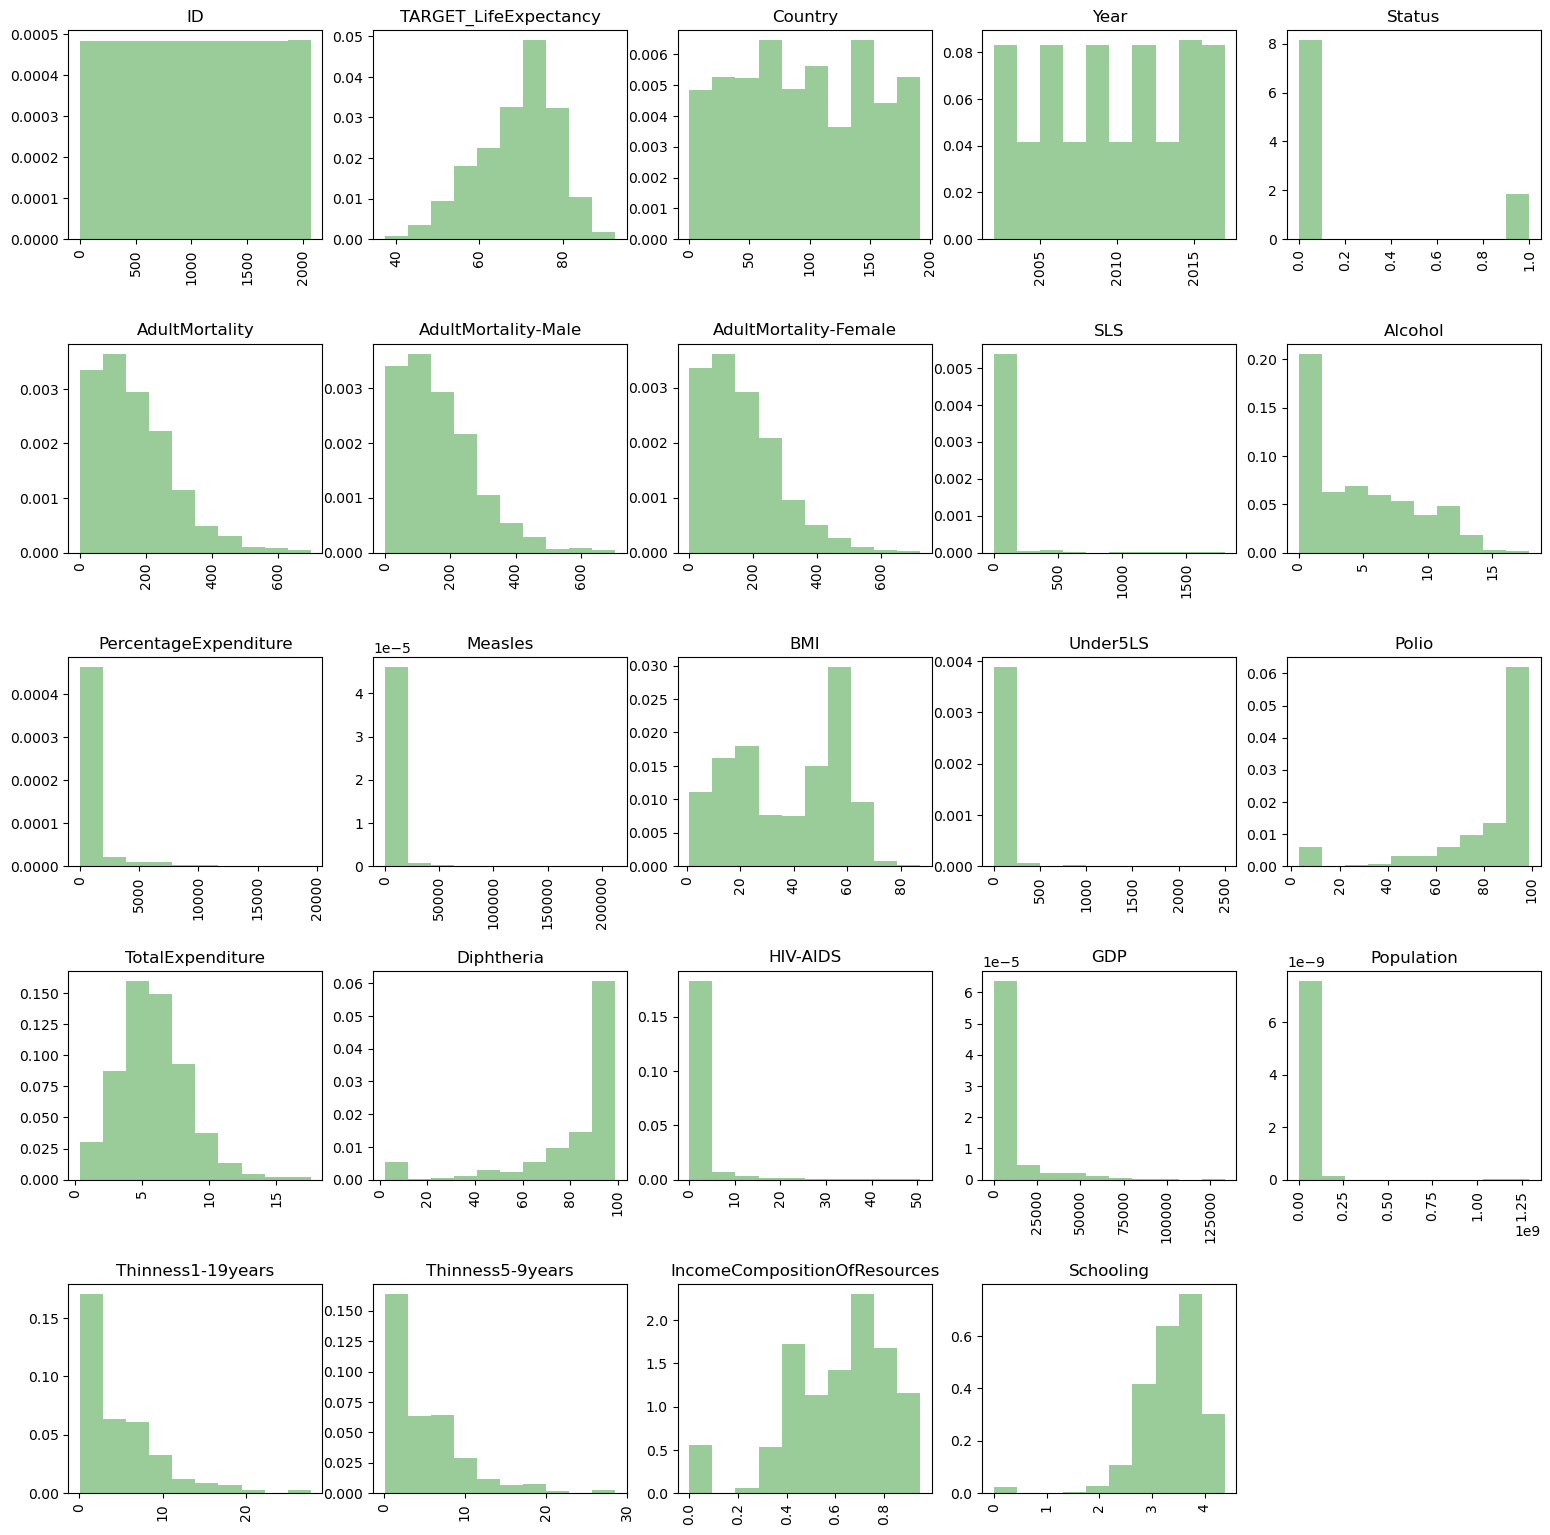

In [7]:
# Set the figure size
plt.figure(figsize=(19,19))

# Iterate over each column
for i, col in enumerate(data.columns):
    # Create subplots
    plt.subplot(5,5,i+1)
    
    # Plot histogram
    plt.hist(data[col], alpha=0.4, color='g', density=True)
    
    # Set title for each subplot
    plt.title(col)
    
    # Rotate x-axis labels vertically
    plt.xticks(rotation='vertical')

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


### Inference

- we can see  schooling is left skewed with some outliers are the extreme left and both thinness columns are heavily right skewed with outliers present on the right side.
- As we can see status is a categorical variable with some majority of the values as 0(developing) and some in 1(developed).
- many attributes are heavily skewed, e.g. schooling alcohol, BMI, Polio, Adult mortality, Dipththeria
- All adults mortality columns are right skewed with some values present on the extreme right side.
- polio is left skewed and we can see some outliers present on the lower values, further investigation is required
- IncomeCompositionOfResources column is left skewed and with outliers present on the left hand side, further investigation required
- Dependent/target variable looks slightly left skewed

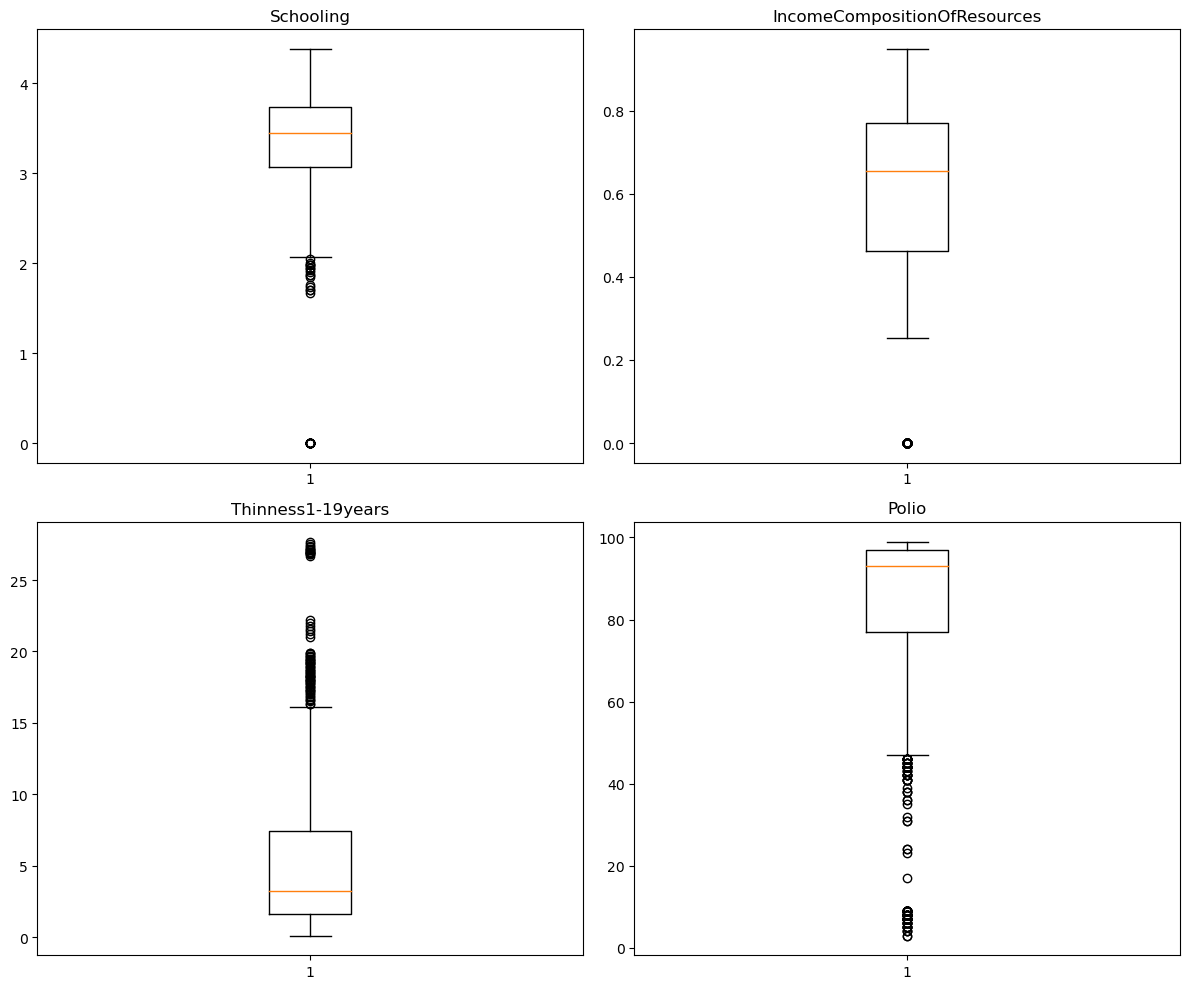

In [8]:
#### Checking outliers in IncomeCompositionofResorunces, schooling and thinness and polio using boxplot

# Setting plot size
plt.figure(figsize=(12, 10))

# mentioning columns to plot in a list
column_names =['Schooling','IncomeCompositionOfResources','Thinness1-19years','Polio']
 
# Iterating through the list of column name and plotting a box plot
for i, col in enumerate(column_names, start=1):
    plt.subplot(2, 2, i)
    plt.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()
    


#### Inference from Box Plots:
**Schooling:**
The median schooling years appear to be around 3.4-3.6 values indicating people attend school for more years and some outliers present
There are few outliers towards higher schooling years, suggesting some regions have significantly higher education levels.

**Income Composition of Resources:**
The box plot shows the spread of income composition values.
Most countries seem to have income composition values concentrated between 0.4 and 0.8.
Some outliers exist, indicating regions with extreme low income compositions.

**Thinness 1-19 years:**
There is significant variability in thinness prevalence across regions, as indicated by the range of values and some outliers 
present in the higher bound side(above 16)
Outliers may represent regions with unusually high or low thinness prevalence rates.

**Polio:**
The box plot displays the distribution of polio immunization coverage among one-year-olds.
Most countries appear to have high polio immunization coverage, with values clustered around 90-100%.
Some outliers suggest regions with lower immunization coverage, which may indicate areas of concern for public health initiatives.

### Relationship between variable
In the previous section we observed each attribute (data column) independently. 
Now we will perform bi-variate analysis using scatter plot which shows correlation b/w variables

Since our task is to predict TARGET_LifeExpectancy (target variable) using all other attributes, let's plot the relationship between MEDV and other columns.

In [ ]:
import warnings

# Filter out warnings
warnings.filterwarnings('ignore')

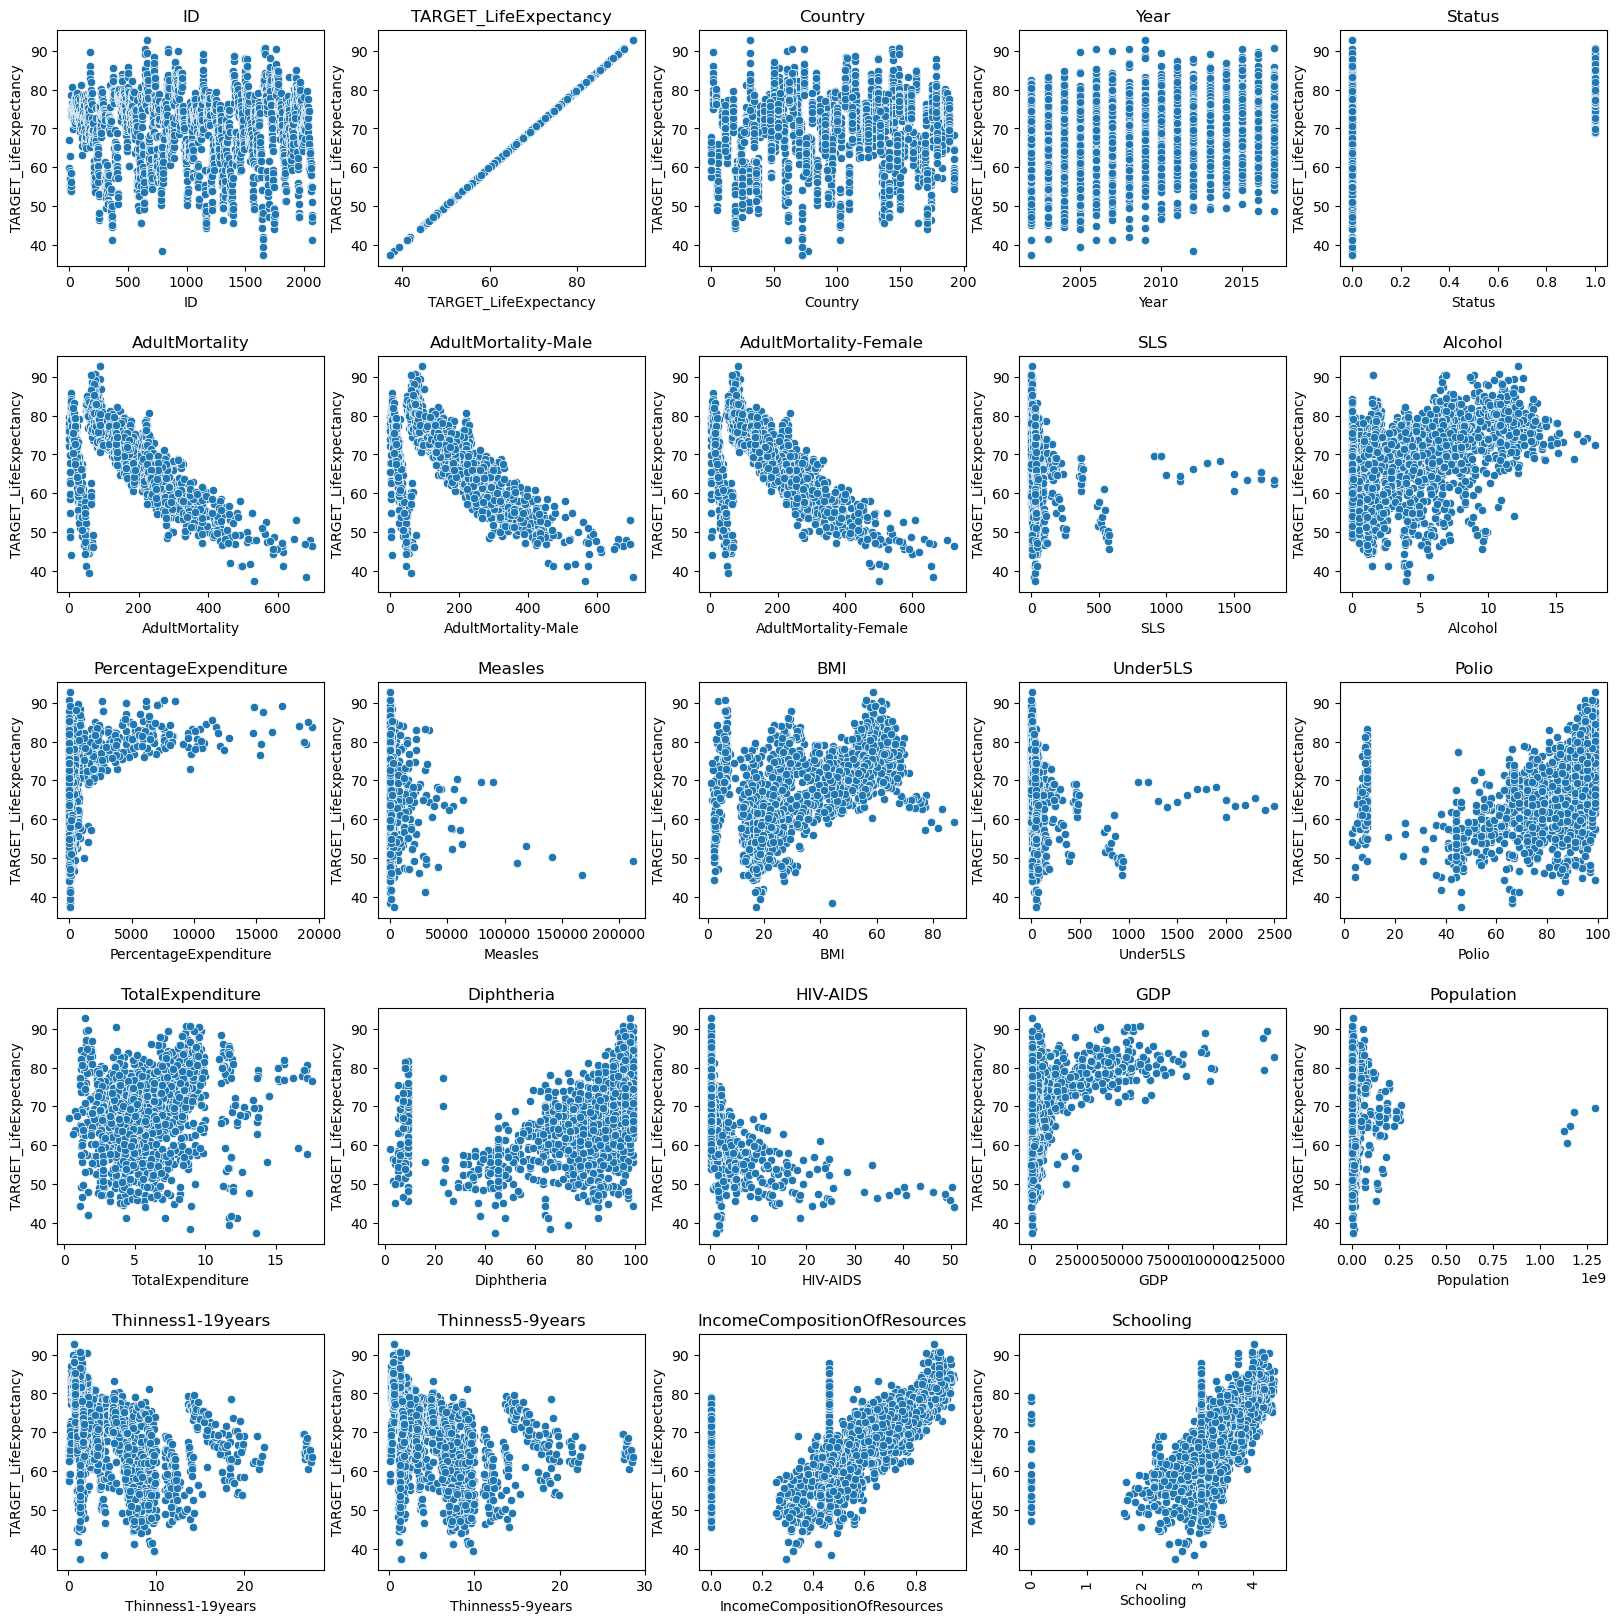

In [9]:
import seaborn as sns
plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(5,5,i+1)
    sns.scatterplot(data=data, x=col, y='TARGET_LifeExpectancy')
    plt.title(col)


# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.38)
plt.xticks(rotation='vertical')
plt.show()

### Inference

- There are some good positive correlation present like IncomeCompositionOfResources, schooling against target variable
- We have negative correlation present in all AdultMortality columns against target variable
- For some attributes the correlation is so minimal, like alcohol, Thinness, BMI against target variable
- Some columns are not correlated at all like country, year, SLS and population against target variable

### Checking correlation for categorical variables (status) using box plot

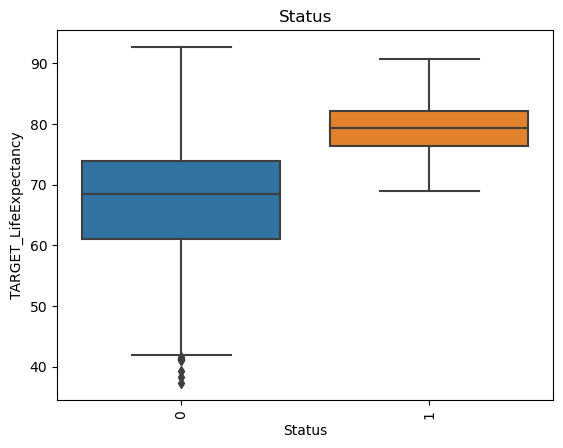

In [10]:
# Using box plot 
ax = sns.boxplot(y='TARGET_LifeExpectancy',x='Status',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Status')

plt.xticks(rotation='vertical')
plt.show()



- On average the life expectancy is high for people in developed(1) countries compared to developing(0) countries
- And we can see the 1st quantile, i.e. people who die young drastically differs where in developed country the age is around 70 and in developing countries the age is below 40

## Creating Correlation heatmap using seaborn library to check correlation betwwen variables

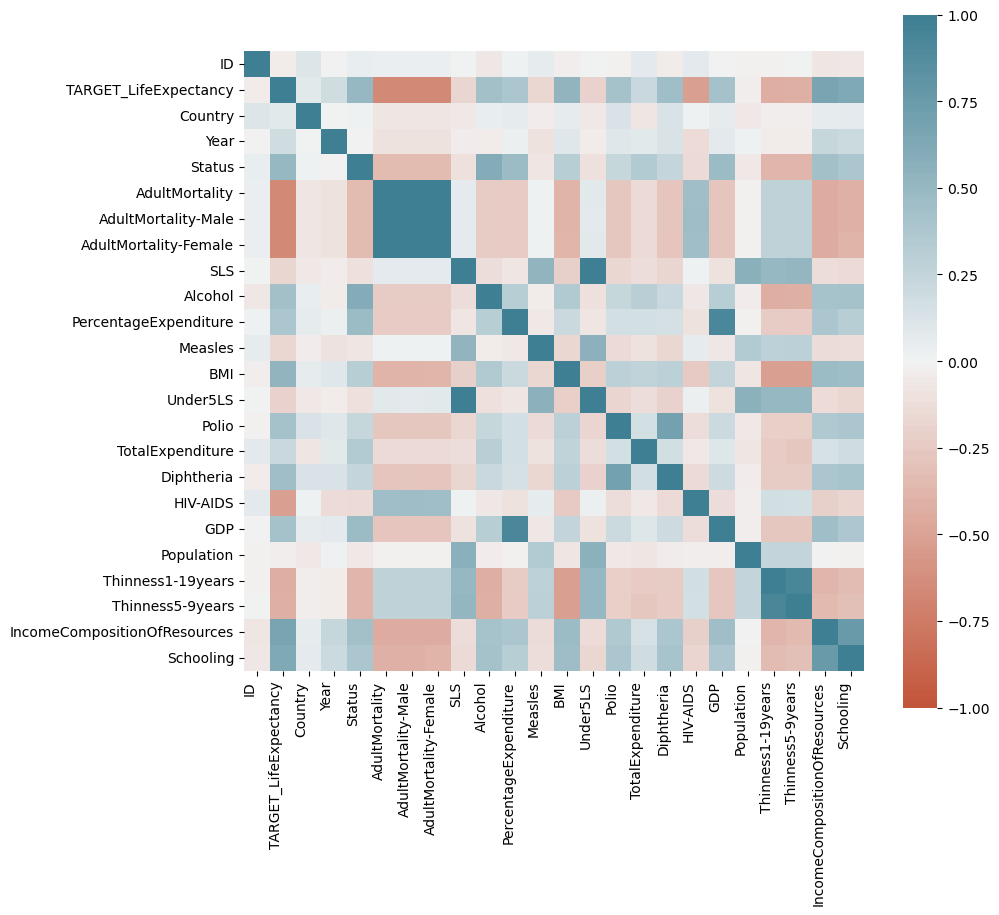

In [11]:
import seaborn as sns


# Creating a subplot with specified figure size
f, ax = plt.subplots(figsize=(10, 9))
# Computing the correlation matrix
corr = data.corr()

# Using a bright color palette
cmap = sns.color_palette("bright")

# Generating heatmap with correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)# Rotate x-axis labels vertically for better readability

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);


### Observation:
    
- variables with **High positive correlation** b/w target variable are:schooling, IncomeCompositionOfResources
- variables with **Average positive correlation** b/w target variable are: GDP,Diphtheria, Polio, BMI, Status
    
- variables with **Negative correlation** b/w target variable are: Thinness column, Adult Mortality, HIV/AIDS
    
- Some attributes have high correlation between them. e.g.Percentageexpenditure and GDP


## Setting up the performance (evaluation) metric

- Considering the nature of our regression problem and the insights from EDA, we aim to choose a performance metric that effectively measures the predictive accuracy of our models and provides a comprehensive evaluation across all target values. Since our goal is to accurately predict life expectancy for various demographic groups, we will prioritize a metric that considers the overall performance across the entire range of life expectancy values.

One such metric that fits our requirements is the root mean squared error (RMSE) and the R-squared (R2) score.

**Root Mean Squared Error (RMSE):** RMSE quantifies the average difference between predicted and actual values. It gives higher weight to larger errors, making it suitable for our regression task where we need to minimize prediction errors across all life expectancy values. By minimizing RMSE, we aim to achieve accurate predictions that closely match the actual life expectancy values.

**R-squared (R2) Score:** R2 score measures the proportion of the variance in the dependent variable (life expectancy) that is predictable from the independent variables (features). It provides an indication of the goodness of fit of our regression model. A higher R2 score indicates a better fit of the model to the data, implying that the model can explain a larger proportion of the variance in life expectancy.

- Thus, we will utilize RMSE and R2 score as our primary performance metrics for evaluating the performance of our regression models. By minimizing RMSE and maximizing R2 score, we aim to build models that accurately predict life expectancy across different demographic groups, contributing to improved public health outcomes.





## Setting the experiment(Data Splitting) for baseline model


- Data splitting helps us check if our model is good at making predictions it hasn't seen before. It also helps us make sure our model doesn't just remember the data it was trained on but actually understands the patterns. Plus, it lets us fine-tune our model without cheating by using the test data too early.

- The scikit-learn Python machine learning library provides an implementation of the train-test splitting via function train_test_split(). Lets use this to randomly split our data to 80% train set and 20% test set.

- for this baseline model,i am dividing the data into 80/20 from train.csv data. 

- I will be performing validation setup when performing to improve baseline model to achieve a best/final model


In [12]:
## Data Splitting using train_test_split package using sklearn library

from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    Lifedf_Train, Lifedf_Test = train_test_split(data, test_size=0.2, shuffle=True)

In [13]:
print("Nunber of instances in the original dataset is {}. After spliting Train has {} instances and test has {} instances."
      .format(data.shape[0], Lifedf_Train.shape[0], Lifedf_Test.shape[0]))

Nunber of instances in the original dataset is 2071. After spliting Train has 1656 instances and test has 415 instances.


In [14]:
# Splitting training data into features and target variable into x_train, y_train and x_test and y_test and storing it as \
# numpy arrays


X_train = Lifedf_Train.drop(columns=['TARGET_LifeExpectancy'], axis = 1)
y_train = Lifedf_Train[['TARGET_LifeExpectancy']]

# Splitting testing data into features (X_test) and target variable (y_test)
X_test = Lifedf_Test.drop(columns=['TARGET_LifeExpectancy'], axis = 1)
y_test = Lifedf_Test[['TARGET_LifeExpectancy']]

In [15]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [16]:
# Checking if the shapes are proper

print('X_train shape is:',X_train.shape)
print('X_test shape is:',X_test.shape)
print('Y_train shape is:',y_train.shape)
print('Y_test shape is:',y_test.shape)


X_train shape is: (1656, 23)
X_test shape is: (415, 23)
Y_train shape is: (1656, 1)
Y_test shape is: (415, 1)


### Feature scaling or normalization:

- I am using Feature scaling because it normalizes the range of features, ensuring each contributes proportionally to the model and preventing dominance by larger-scaled features. 
- It stabilizes models by handling skewed or outlier-rich distributions, ensuring robustness in convergence. Consistent feature scales prevent bias in distance-based algorithms, fostering fair comparison across features. 
- Normalization is vital for regularization techniques, preventing bias towards large-scale features and enhancing model generalization. It accelerates convergence in optimization-based models like gradient descent, improving training efficiency and preserving feature relationships for enhanced interpretability.

### Choosing standard scaler for baseline model.

- From the EDA, we can infer that there is some skewness present in the data and outliers present. standard scaler is more robust to outliers that min-max scaler and it preserves the original distribution of the data.

- Using StandardScaler in the baseline model ensures that all features are standardized, with a mean of 0 and a standard deviation of 1. This simplifies the interpretation of coefficients in linear regression and provides a consistent preprocessing step for evaluating more complex techniques.



In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training features
scaler.fit(X_train)

# Transform the training features
X_train_scaled = scaler.transform(X_train)

# Transform the testing features
X_test_scaled = scaler.transform(X_test)



In [18]:
type(X_test_scaled)

numpy.ndarray

### Choosing Multivariate Linear Regression as a baseline model

- Multivariate linear regression is chosen as the baseline model for this dataset because it's a simple and interpretable method for modeling the relationship between multiple independent variables (features) and a single dependent variable (target). Since the dataset contains multiple features (such as AdultMortality, BMI, HIV-AIDS, etc.) that could potentially influence life expectancy, multivariate linear regression allows us to assess the combined effect of these features on the target variable. Additionally, linear regression provides easily interpretable coefficients that represent the change in the target variable for a one-unit change in each predictor variable, making it a suitable starting point for analysis.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
linear_reg_model = LinearRegression()

# Fitting the model to the training data
linear_reg_model.fit(X_train_scaled, y_train)

# Predicting the target variable for training set
y_train_pred = linear_reg_model.predict(X_train_scaled)

# Evaluating the model on training set
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print("Training RMSE:", train_rmse)


Training RMSE: 4.681589943442267


In [20]:
# Printing the intercept

print("Parameter of the Linear model: ", linear_reg_model.coef_)
print("Intercept of the Linear model: ", linear_reg_model.intercept_)

Parameter of the Linear model:  [[  0.24634458   0.12781902   0.2537235    0.98270808  -0.73292032
    0.31043987  -1.77503676  13.53087232   0.86135174  -0.16809695
   -0.07148059   0.48193673 -13.72225838   0.50936863  -0.03858834
    0.7612574   -2.44468977   0.78235107  -0.03974078  -0.4818267
   -0.1196174    1.56387577   1.32041874]]
Intercept of the Linear model:  [69.43067633]


### Predicting and Evaluating for Test set for baseline model

In [21]:
# Predict the target variable for testing set
y_test_pred = linear_reg_model.predict(X_test_scaled)

# Evaluate the model on testing set
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Testing RMSE:", test_rmse)


Testing RMSE: 4.622440012063845


In [22]:
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

Training RMSE: 4.681589943442267
Testing RMSE: 4.622440012063845


- The provided RMSE values suggest that the model performs reasonably well on both the training and testing data, with slightly better performance on the training set. However, further evaluation and refinement of the model may be necessary to improve its generalization to unseen data and ensure robust performance.

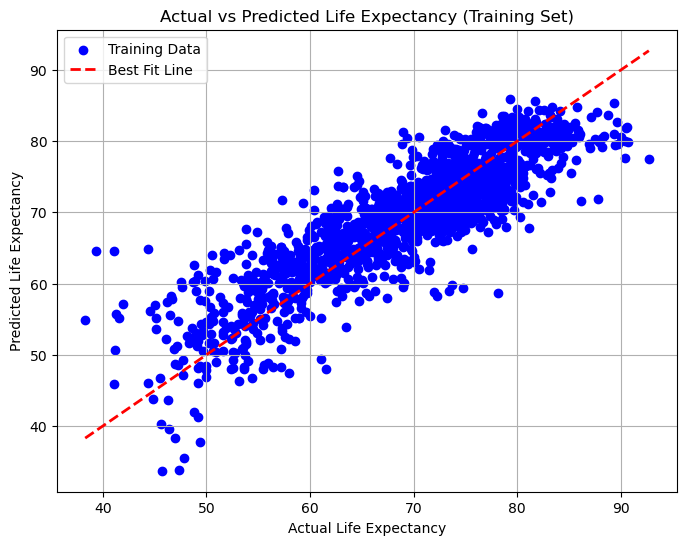

In [23]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for training set
plt.figure(figsize=(8, 6)) # Setting the figure size
# Scatter plot of actual vs predicted values
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
 # Plotting the best fit line
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Best Fit Line')
plt.xlabel('Actual Life Expectancy') # Label for x-axis
plt.ylabel('Predicted Life Expectancy') # Label for y-axis
plt.title('Actual vs Predicted Life Expectancy (Training Set)') # Title for the plot
plt.legend()
plt.grid(True)
plt.show()


- This plot compares the actual life expectancy values (y-axis) with the predicted life expectancy values (x-axis) for the training set. Each point on the scatter plot represents an instance from the training data. The diagonal line (in red) represents the ideal scenario where the actual and predicted values are equal. The blue dots represent the actual vs. predicted values obtained from the model. By comparing the distribution of points around the diagonal line, we can visually assess how well the model's predictions align with the actual data

- The best fit line tells us that the model generalise in a reasonable manner

In [24]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_test_pred)
print('The R^2 score for the linear regression model is: {:.3f}'.format(r2_lr))

The R^2 score for the linear regression model is: 0.743


- The R^2 score suggest that the model is performing averagely and we should imporve the model accuracy by better/required  feature engineering,feature scaling techniques and regularization along with hyper-parameter tuning for better results. 

- The hypothesis 1, we kept for the baseline model was 0.75, my baseline model have achieved 0.743 in r2 value. So, its a good \
start, have to further investigate and improve the model through following all the model development steps.

### Feature importance
Another key technique used to investigate simple models is feature importance. Here we estimate how much each feature contributed towards the final prediction value. For linear models this is straightforward. We can simply look at the model coefficients.

In [25]:
### Checking base model feature importance based on attributes coefficient
# Output coefficients and storing it in variables

coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

print("Intercept:", intercept)
print("Coefficients:", coefficients)



Intercept: [69.43067633]
Coefficients: [[  0.24634458   0.12781902   0.2537235    0.98270808  -0.73292032
    0.31043987  -1.77503676  13.53087232   0.86135174  -0.16809695
   -0.07148059   0.48193673 -13.72225838   0.50936863  -0.03858834
    0.7612574   -2.44468977   0.78235107  -0.03974078  -0.4818267
   -0.1196174    1.56387577   1.32041874]]


In [26]:
# Creating two list to store negative and positive correlation in a list

negative_coef, positive_coef = [],[]
# #print(negative_coef,positive_coef)

# # Checking which features has negative coefficient and postive coefficient and storing it in two separate list
for feature, coef in zip(X_train.columns.tolist(), coefficients[0]):
    if coef < 0:
        negative_coef.append((feature,coef))
    else:
        positive_coef.append((feature,coef))
            
print('Positive Coefficient:\n' ,positive_coef )
print()
print('Negative Coefficient:\n',negative_coef)



Positive Coefficient:
 [('ID', 0.24634457834537143), ('Country', 0.12781901606590296), ('Year', 0.25372350076154), ('Status', 0.9827080770366554), ('AdultMortality-Male', 0.31043987190499095), ('SLS', 13.53087232306293), ('Alcohol', 0.8613517418154819), ('BMI', 0.4819367255301873), ('Polio', 0.5093686307513954), ('Diphtheria', 0.761257402575704), ('GDP', 0.7823510682057497), ('IncomeCompositionOfResources', 1.5638757737533715), ('Schooling', 1.3204187425866032)]

Negative Coefficient:
 [('AdultMortality', -0.732920316198729), ('AdultMortality-Female', -1.7750367643771137), ('PercentageExpenditure', -0.16809694562631952), ('Measles', -0.0714805948081782), ('Under5LS', -13.722258382331352), ('TotalExpenditure', -0.03858833985854082), ('HIV-AIDS', -2.4446897664981617), ('Population', -0.03974078322873595), ('Thinness1-19years', -0.4818266998286709), ('Thinness5-9years', -0.11961739930559975)]


- As we can see there is high negative correlations between Under5LS column with the target variable.
- For the feature engineering part i am gonna keep only the positive correlation removing ID from the list and then first to model and check the accuracy

In [27]:
# From this positive coefficient ID doesnt contain any value, so we can remove it

In [28]:
## Saving positive and negative coefficients feature names in a list to choose which features is of more importance\
## and we'll do feature scaling for that feature and perform hyperparameter tuning.

# Create a list of feature names with positive coefficients
positive_features = [feature for feature, coef in positive_coef]

# Create a new dataset with only the features that have positive coefficients except ID
positive_correlated_data = X_train[positive_features]
positive_correlated_data_df = positive_correlated_data.drop(columns=['ID'])

# Display the new dataset
print("Dataset with positive correlated coefficient attributes:")
print(positive_correlated_data.shape)
print(positive_correlated_data_df.shape)
#print(positive_correlated_data_df)

Dataset with positive correlated coefficient attributes:
(1656, 13)
(1656, 12)


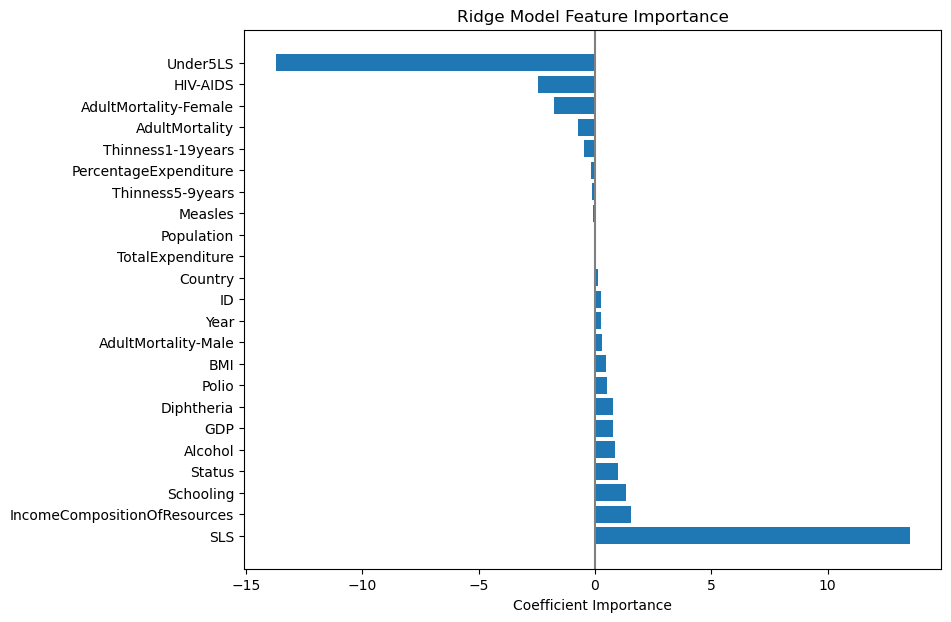

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieving Column names and storing it in column_names column to plot the graph
column_names = X_train.columns.tolist()


# Creating a DataFrame to store coefficients with corresponding column names
coefs_df = pd.DataFrame({'Feature': column_names, 'Coefficient': coefficients.flatten()})

# Sorting coefficients by importance
coefs_df_sorted = coefs_df.sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(9, 7))
plt.barh(coefs_df_sorted['Feature'], coefs_df_sorted['Coefficient'])
plt.xlabel('Coefficient Importance')
plt.title('Ridge Model Feature Importance')
plt.axvline(x=0, color='.5')  # Add a vertical line at zero
plt.show()


The **Ridge Model Feature Importance plot** displays the contribution of each feature to the target variable:

- **Positive Coefficients**: Features with bars extending to the right have a positive impact on the target variable. Longer bars indicate stronger positive influence.

- **Negative Coefficients**: Features with bars extending to the left have a negative impact on the target variable. Longer bars signify a stronger negative influence.

- **Magnitude of Coefficients**: The length of each bar represents the coefficient's magnitude, indicating its impact on the target variable.

- **Relative Importance**: Comparing bar lengths helps identify the most influential features for predicting the target variable, distinguishing between stronger and weaker contributors.



## **Based on the coefficients obtained from the Ridge Model plot:**

- **Positive Coefficients**: Features such as 'Status', 'SLS', 'Alcohol', 'BMI', 'Polio', 'Diphtheria', 'GDP', 'IncomeCompositionOfResources', and 'Schooling' have positive coefficients, indicating a positive impact on the target variable (life expectancy). Among these, 'SLS' (Sanitation and safe water access) has the highest positive coefficient, followed by 'IncomeCompositionOfResources' and 'Schooling'.

- **Negative Coefficients**: Features like 'AdultMortality', 'AdultMortality-Male', 'AdultMortality-Female', 'Under5LS', 'HIV-AIDS' have negative coefficients, indicating a negative impact on life expectancy. Among these, 'Under5LS' (Under-five mortality rate) has the most significant negative coefficient, followed by 'HIV-AIDS' and 'AdultMortality-Male'.


## FINAL MODEL BUILDING- Increasing baseline Model performance 
- **Step 1:** Performing data splitting into train, test and validation

### Setting up the experiment for the final model 

- Splitting the data into training, validation, and test sets. The purpose of this is to assess the model's performance on unseen data, avoid overfitting, and fine-tune the model for optimal results.

- For the final model, I'll divide the data from train.csv into three parts: **60% for training, 20% for validation, and 20% for testing**. This division allows us to train the model on a large portion of the data, validate its performance on a separate set to make adjustments, and finally evaluate its generalization ability on completely unseen data.

- for this final model,I am dividing the data into 60/20/20 from train.csv data. 

- Performing this data splitting ensures that our final model has not only learned from the training data but also understands the underlying patterns in the data and can make accurate predictions on new instances. It helps us ensure that the model's performance is reliable and consistent across different datasets, enhancing its robustness and applicability in real-world scenarios.

### Final Splitting for Training, Validation and testing

- For final model, the data splitting follows 60-20-20 (Training, validation and testing) using train.csv file

In [31]:
## Correct split for final model


# Splitting training data into features and target variable
# Removing ID column because it doesn't carry any information correlated to the output
X_train_base = Lifedf_Train.drop(columns=['ID','TARGET_LifeExpectancy'])
y_train_base = Lifedf_Train[['TARGET_LifeExpectancy']]
#X_test_final = Lifedf_Test


# This X_test_base and y_test_base, i wont touch it, after validation and choosing final model, i'll test that model\
# with this X_test_base and y_test_base below
X_test_base = Lifedf_Test.drop(columns=['ID','TARGET_LifeExpectancy'])
y_test_base = Lifedf_Test[['TARGET_LifeExpectancy']]

# Splitting training data into features and target variable into training and validation sets
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_base, y_train_base, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2



In [32]:
# Ensuring the splits have been done correctly
print("Training x data shape from base model:", X_train_base.shape)
print("Training y data shape from base shape:", y_train_base.shape)

print("Final Test set X_test_base data shape from base model:", X_test_base.shape)
print("Final Test y_test_base from base shape:", y_test_base.shape)


print("Final Training X_train_final data shape from train and validation split:", X_train_final.shape)
print("Final Training  y_train_final data shape from train and validation split:", y_train_final.shape)


print("Final Validation X_val_final data shape from train and validation split:", X_val_final.shape)
print("Final Validation  y_val_final data shape from train and validation split:", y_val_final.shape)



Training x data shape from base model: (1656, 22)
Training y data shape from base shape: (1656, 1)
Final Test set X_test_base data shape from base model: (415, 22)
Final Test y_test_base from base shape: (415, 1)
Final Training X_train_final data shape from train and validation split: (1242, 22)
Final Training  y_train_final data shape from train and validation split: (1242, 1)
Final Validation X_val_final data shape from train and validation split: (414, 22)
Final Validation  y_val_final data shape from train and validation split: (414, 1)


### Step 2: Choosing Appropriate Scalings for different attributes based on EDA for Train, Validation & Test

To determine whether to use Min-Max scaling or PowerTransformer for feature scaling for each attribute, I am considering the following guidelines:

**Min-Max Scaling:**

- Using Min-Max scaling for attributes with bounded ranges and relatively linear distributions.

- Attributes such as 'Year', 'Status', 'GDP', 'Population', and any other attributes with values that have clear minimum and maximum bounds are suitable for Min-Max scaling.
- Min-Max scaling preserves the original distribution shape of the data and maps it to a specified range, typically [0, 1] or [-1, 1].

- **Min_Max_Attributes =** ['Alcohol','BMI','Year', 'Status', 'GDP', 'Population','Country','TotalExpenditure','IncomeCompositionOfResources','Schooling']


**PowerTransformer:**


- Using PowerTransformer (e.g., Yeo-Johnson transformation) for attributes with skewed or non-linear distributions.
- Attributes such as 'AdultMortality-Male', 'AdultMortality-Female', 'Thinness1-19years', and any other attributes with skewed distributions or outliers may benefit from PowerTransformer.
- PowerTransformer applies a power transformation to make the distribution of the data more Gaussian-like, which can improve  the performance of models that assume Gaussian-distributed features.
- **Power_Transformer_Attributes =** ['AdultMortality','AdultMortality-Male','AdultMortality-Female','','Thinness1-19years','Thinness5-9years','SLS','Under5LS','PercentageExpenditure','Measles','Polio','Diphtheria','HIV-AIDS']

In [34]:
min_max_attributes = ['Alcohol','BMI','Year', 'Status', 'GDP', 'Population','Country','TotalExpenditure',\
           'IncomeCompositionOfResources','Schooling']

power_transformer_attributes = ['AdultMortality','AdultMortality-Male','AdultMortality-Female','Thinness1-19years',\
                                'Thinness5-9years','SLS','Under5LS','PercentageExpenditure','Measles',\
                                'Polio','Diphtheria','HIV-AIDS']

### Steps performed for feature scaling:

1. **Importing Libraries**: First, importing the necessary libraries for data preprocessing and suppress warnings to avoid cluttering the output.

2. **Defining Attributes**: defining the attributes to be used for the PowerTransformer and MinMaxScaler based on the dataset's characteristics.

3. **Creating Data Copies**: Next, we create copies of the training, test, and validation data to avoid modifying the original datasets.

4. **Training**: Everytime training/fitting all the scaling functions on train dataset and using that to perform transformation for on the validation and test sets.

4. **MinMax Scaling**: fitting and transforming the MinMaxScaler on the min-max attributes for all datasets, ensuring that these features are scaled to a specific range.

5. **Power Transformation**: We fit and transform the PowerTransformer on the power transformer attributes for all datasets, adjusting the distribution of these features.

6. **MinMax Scaling (Power Transformer Attributes)**: Finally, we fit and transform the MinMaxScaler on the power transformer attributes for all datasets, ensuring that all these features in the final dataset are on the same scale after the power transformation.


In [35]:
X_train_final.columns

Index(['Country', 'Year', 'Status', 'AdultMortality', 'AdultMortality-Male',
       'AdultMortality-Female', 'SLS', 'Alcohol', 'PercentageExpenditure',
       'Measles', 'BMI', 'Under5LS', 'Polio', 'TotalExpenditure', 'Diphtheria',
       'HIV-AIDS', 'GDP', 'Population', 'Thinness1-19years',
       'Thinness5-9years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [36]:

# Importing required libraries for the operation
from sklearn.preprocessing import MinMaxScaler, PowerTransformer


# Defining attributes for power transformer and min-max scaler
power_transformer_attributes = ['AdultMortality','AdultMortality-Male','AdultMortality-Female','Thinness1-19years',\
                                'Thinness5-9years','SLS','Under5LS','PercentageExpenditure','Measles',\
                                'Polio','Diphtheria','HIV-AIDS']

# Using set function to get the remaining attributes assigned to min_max_attributes
min_max_attributes = list(set(X_train_final.columns).difference(set(power_transformer_attributes)))


# Creating copies of training, test, and validation data
life_X_train_scaled = X_train_final.copy()
life_X_test_scaled = X_test_base.copy()
life_X_val_scaled = X_val_final.copy()

# Fitting and transforming MinMaxScaler() on min-max attributes for training, test, and validation data
minmaxscaler = MinMaxScaler().fit(life_X_train_scaled.loc[:, min_max_attributes])
life_X_train_scaled.loc[:, min_max_attributes] = minmaxscaler.transform(life_X_train_scaled.loc[:, min_max_attributes])
life_X_test_scaled.loc[:, min_max_attributes] = minmaxscaler.transform(life_X_test_scaled.loc[:, min_max_attributes])
life_X_val_scaled.loc[:, min_max_attributes] = minmaxscaler.transform(life_X_val_scaled.loc[:, min_max_attributes])

# Fitting and transforming PowerTransformer() on power transformer attributes for training, test, and validation data
powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(life_X_train_scaled.loc[:, power_transformer_attributes])
life_X_train_scaled.loc[:, power_transformer_attributes] = powertransformer.transform(life_X_train_scaled.loc[:, power_transformer_attributes])
life_X_test_scaled.loc[:, power_transformer_attributes] = powertransformer.transform(life_X_test_scaled.loc[:, power_transformer_attributes])
life_X_val_scaled.loc[:, power_transformer_attributes] = powertransformer.transform(life_X_val_scaled.loc[:, power_transformer_attributes])

# Fitting and transforming MinMaxScaler on power transformer attributes for training, test, and validation data
minmaxscaler_pt = MinMaxScaler().fit(life_X_train_scaled.loc[:, power_transformer_attributes])
life_X_train_scaled.loc[:, power_transformer_attributes] = minmaxscaler_pt.transform(life_X_train_scaled.loc[:, power_transformer_attributes])
life_X_test_scaled.loc[:, power_transformer_attributes] = minmaxscaler_pt.transform(life_X_test_scaled.loc[:, power_transformer_attributes])
life_X_val_scaled.loc[:, power_transformer_attributes] = minmaxscaler_pt.transform(life_X_val_scaled.loc[:, power_transformer_attributes])




## Checking Outlier detection before and after scaling

## Distribution of Attributes before scaling

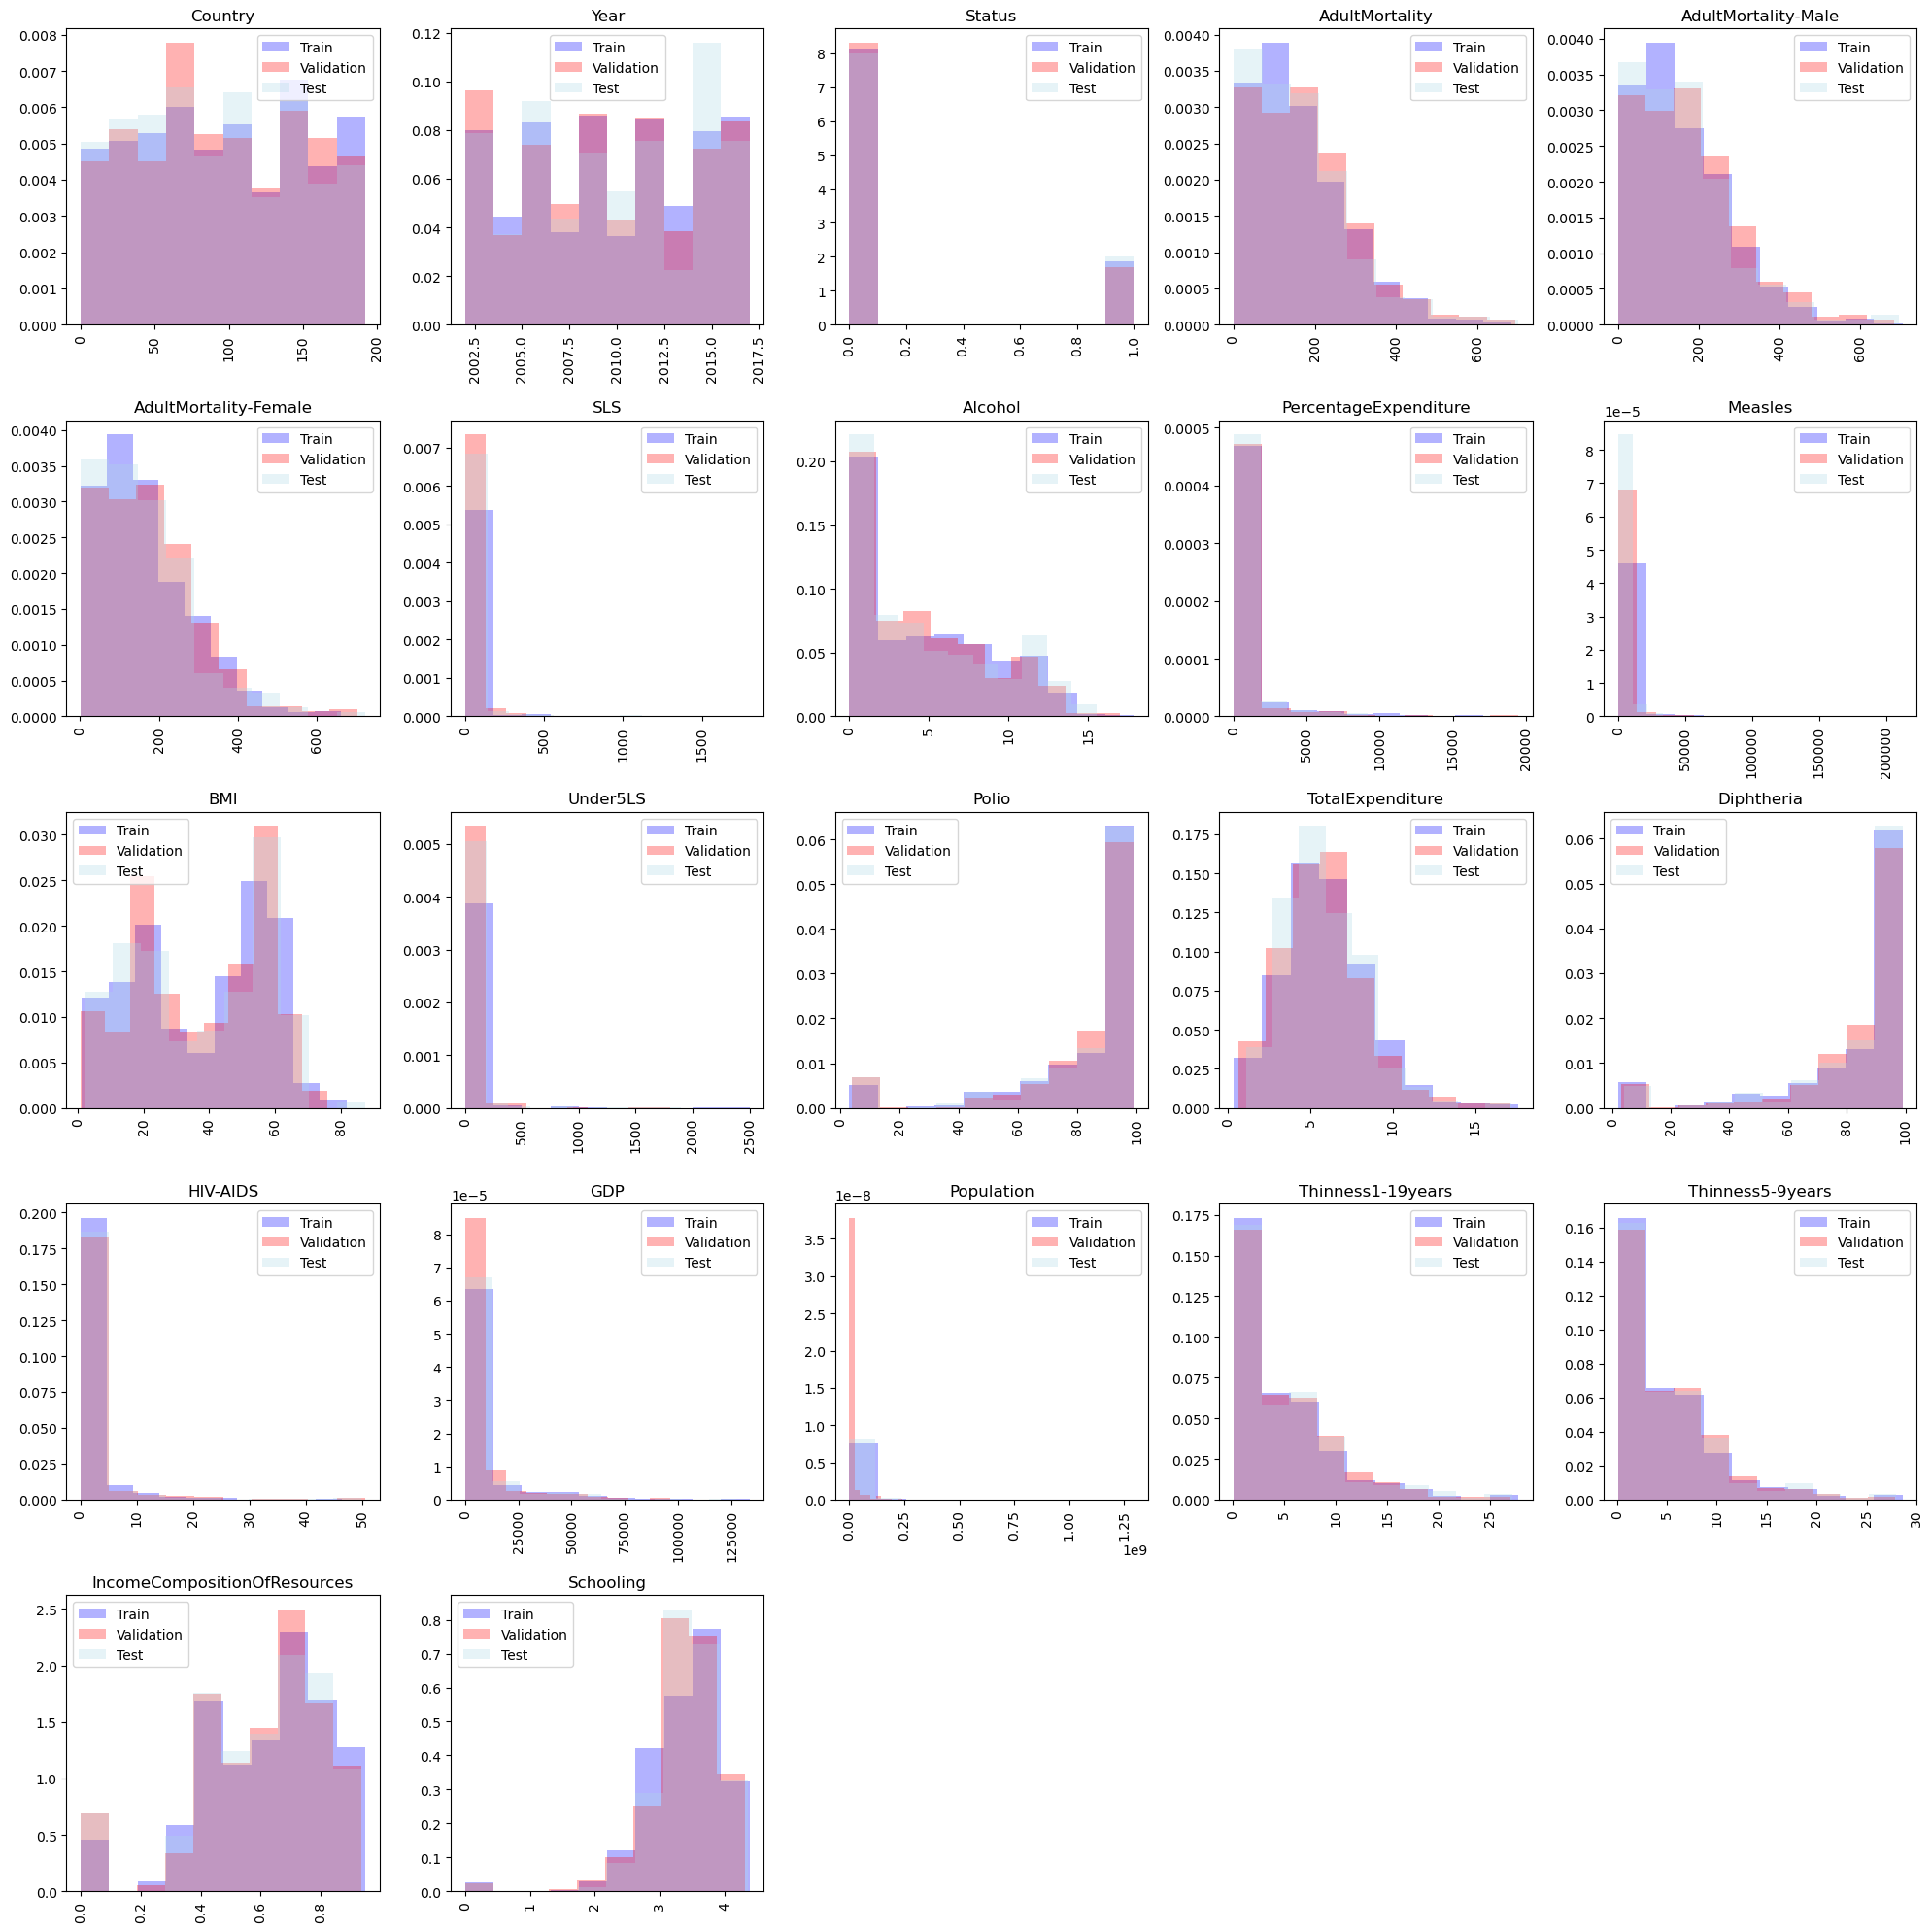

In [37]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(X_train_final.columns):
    plt.subplot(5, 5, i + 1)
    plt.hist(X_train_final[col], alpha=0.3, color='b', density=True, label='Train')
    plt.hist(X_test_base[col], alpha=0.3, color='r', density=True, label='Validation')
    plt.hist(X_val_final[col], alpha=0.3, color='lightblue', density=True, label='Test')
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.legend()

plt.tight_layout()
plt.show()

## Distribution of Attributes after scaling

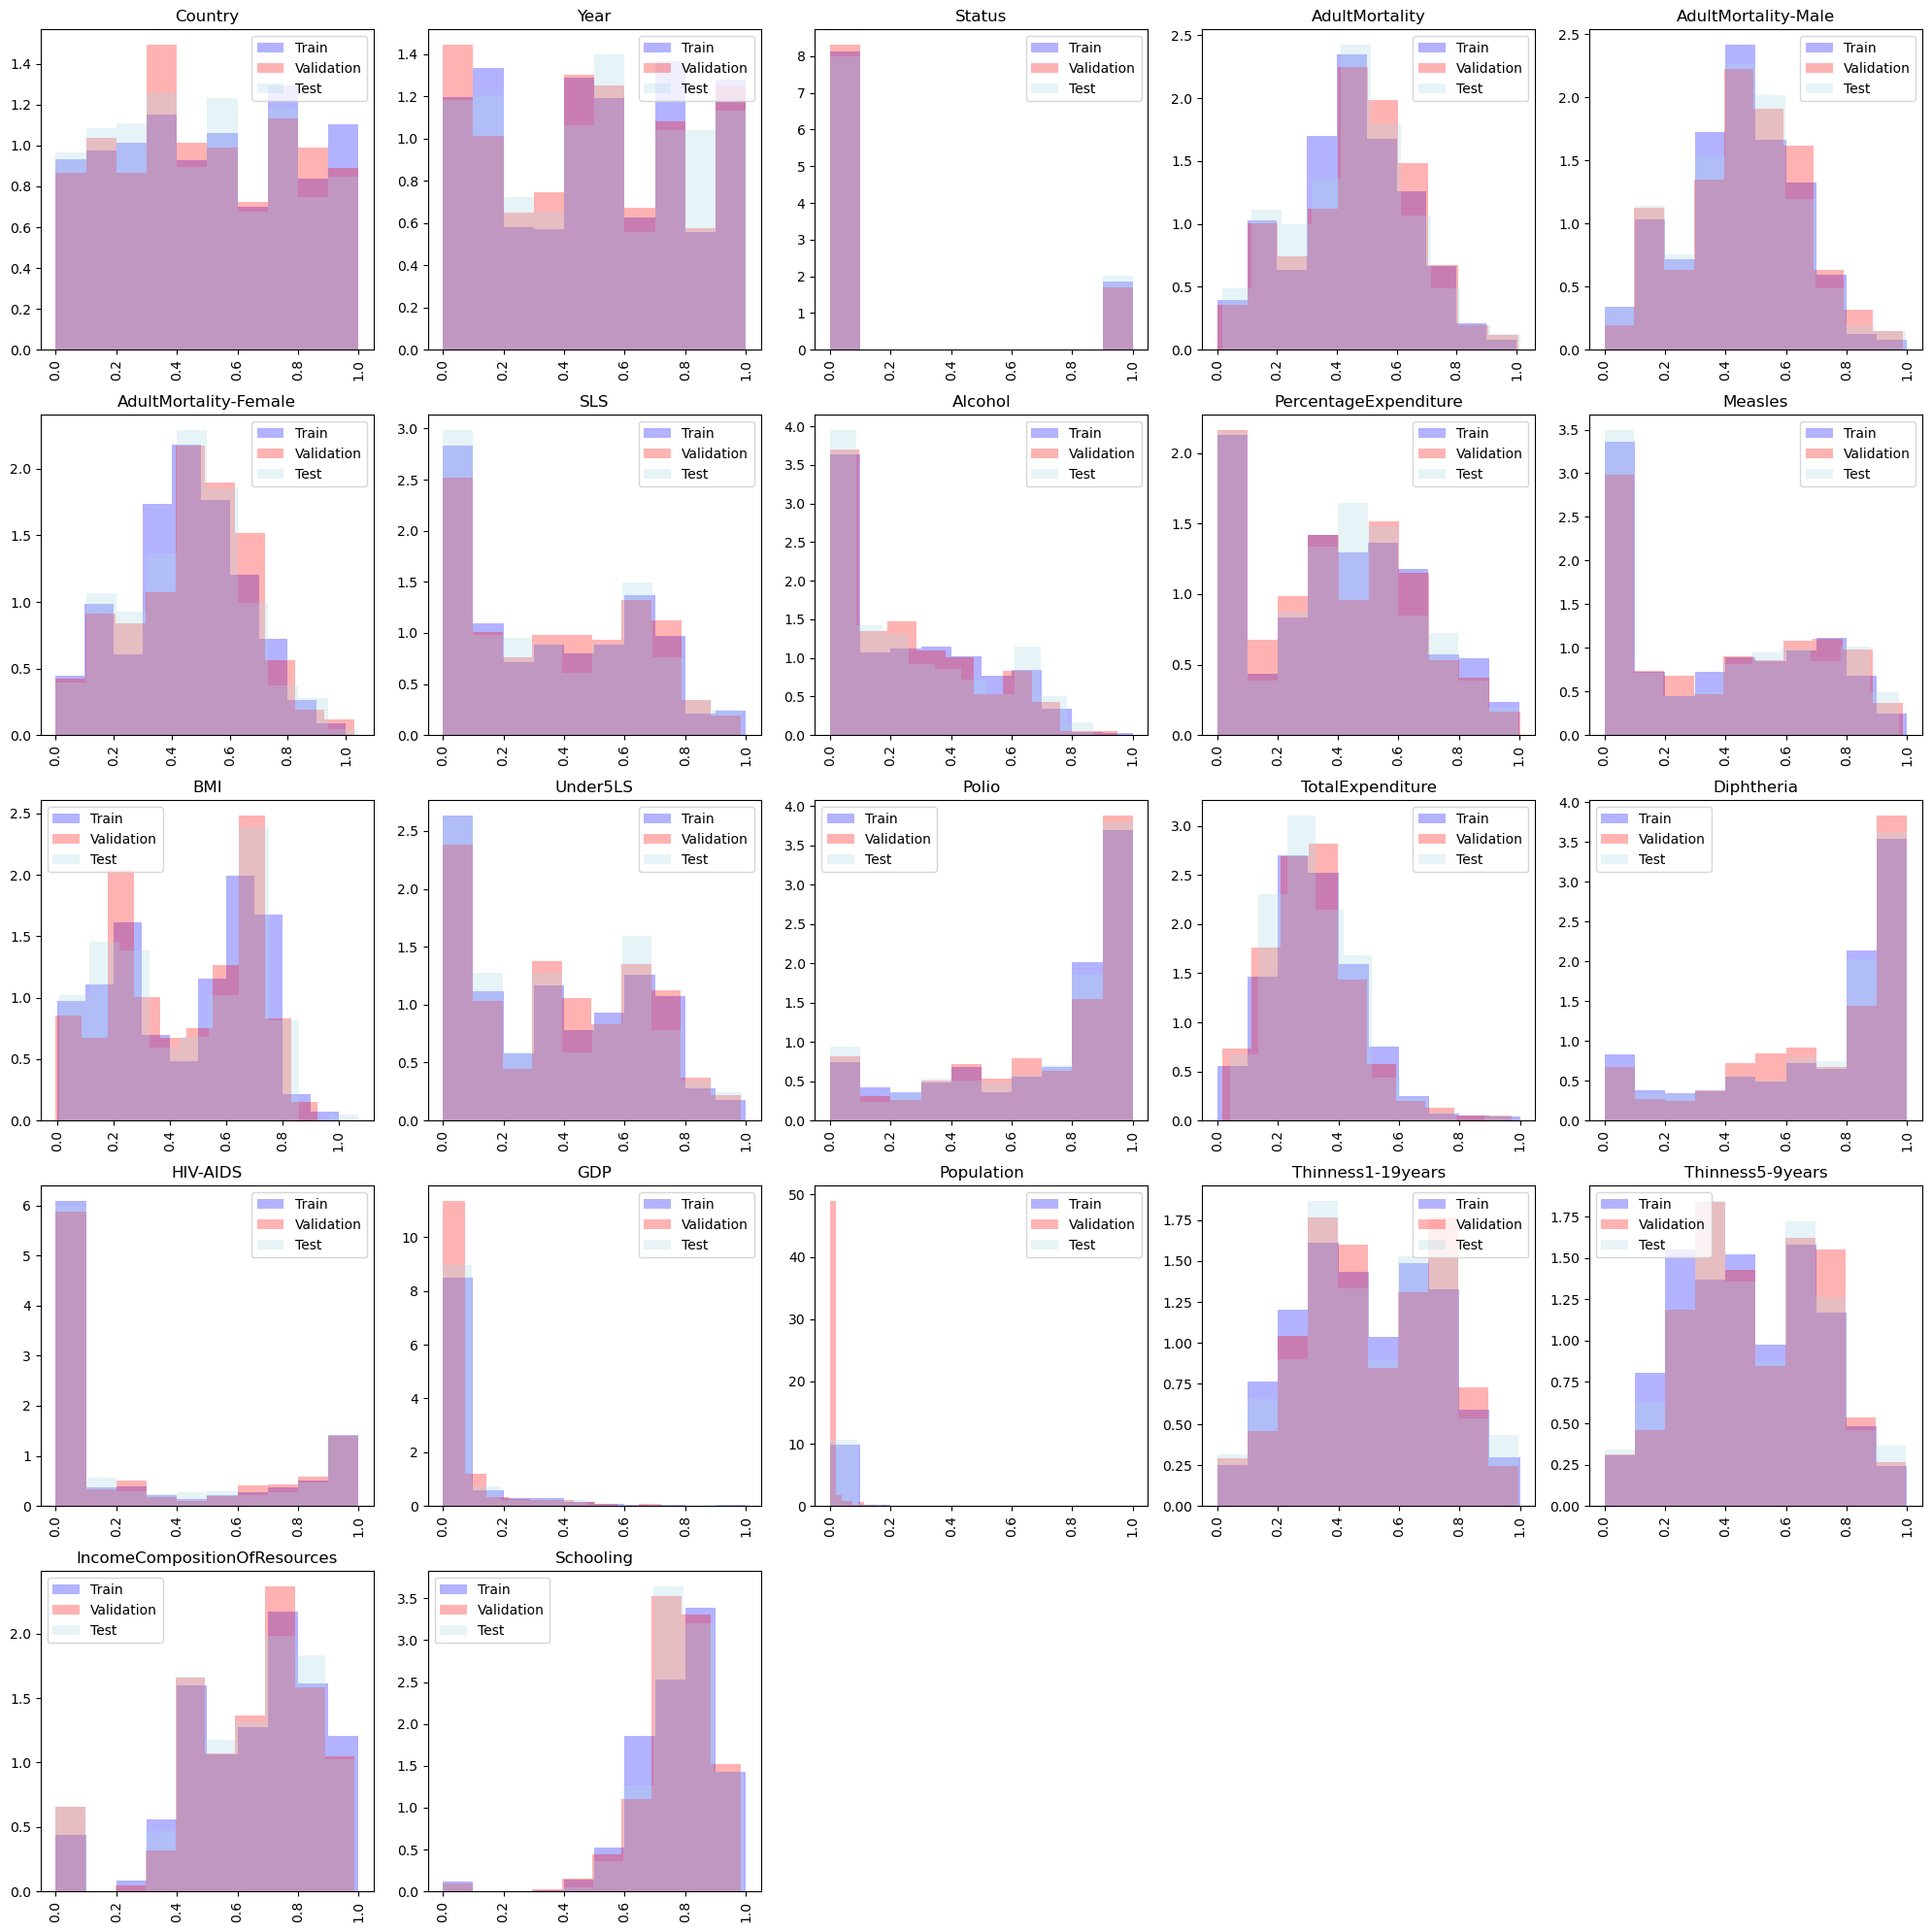

In [38]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(life_X_train_scaled.columns):
    plt.subplot(5, 5, i + 1)
    plt.hist(life_X_train_scaled[col], alpha=0.3, color='b', density=True, label='Train')
    plt.hist(life_X_test_scaled[col], alpha=0.3, color='r', density=True, label='Validation')
    plt.hist(life_X_val_scaled[col], alpha=0.3, color='lightblue', density=True, label='Test')
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.legend()

plt.tight_layout()
plt.show()




**After applying transformations to our data:**

**Changes in Adult Mortality Columns:** All three adult mortality columns now look more like normal distributions, with fewer values that stand out as extreme. This transformation, likely done using a technique such as power transformation, seems to have made these features more stable.

**Less Outliers:** Across all features, we see fewer outlier values. This change has made the data easier to work with for analysis and modeling because extreme values have less influence.

**Decision on Outliers:** Because the transformations have already reduced outliers significantly and made the data more normal, I'm thinking i wont perform operations removing outliers because its so minimal(i.e by seeing the plot it can be less than 2% in very few columns). Training our model with data that has outliers might help it learn better for real-life situations when outliers are present.

In short, while the current approach looks promising, we need to carefully test our model's performance with outliers included to make sure it works well in practical situations. 

In [39]:
# Printing to check if the transformation was successful

print(life_X_train_scaled.shape)
life_X_train_scaled.head()

(1242, 22)


,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
1705,0.562500,0.800000,1.0,0.289667,0.297214,0.285814,0.181050,0.522956,0.835654,0.734945,...,0.942174,0.523506,0.944300,0.0,0.239661,3.615015e-03,0.150108,0.117727,0.918776,0.946485
716,0.755208,0.266667,0.0,0.443317,0.446021,0.444078,0.181050,0.208847,0.196929,0.841675,...,0.307020,0.473593,0.512367,0.0,0.001055,3.254604e-06,0.457105,0.454471,0.732068,0.790569
1194,0.578125,0.400000,0.0,0.354442,0.361122,0.351277,0.000000,0.090146,0.637358,0.472077,...,0.970802,0.406268,0.971892,0.0,0.037147,2.310916e-07,0.853627,0.842026,0.656118,0.790569
375,0.281250,0.533333,0.0,0.354442,0.344111,0.369126,0.274118,0.408735,0.533614,0.000000,...,0.886602,0.377249,0.890649,0.0,0.014934,1.287768e-02,0.215333,0.203686,0.848101,0.889757
1658,0.333333,0.733333,1.0,0.059695,0.057356,0.064589,0.000000,0.100224,0.633845,0.575514,...,0.914109,0.206616,0.917221,0.0,0.446123,9.847362e-05,0.389480,0.371880,0.960970,0.889757


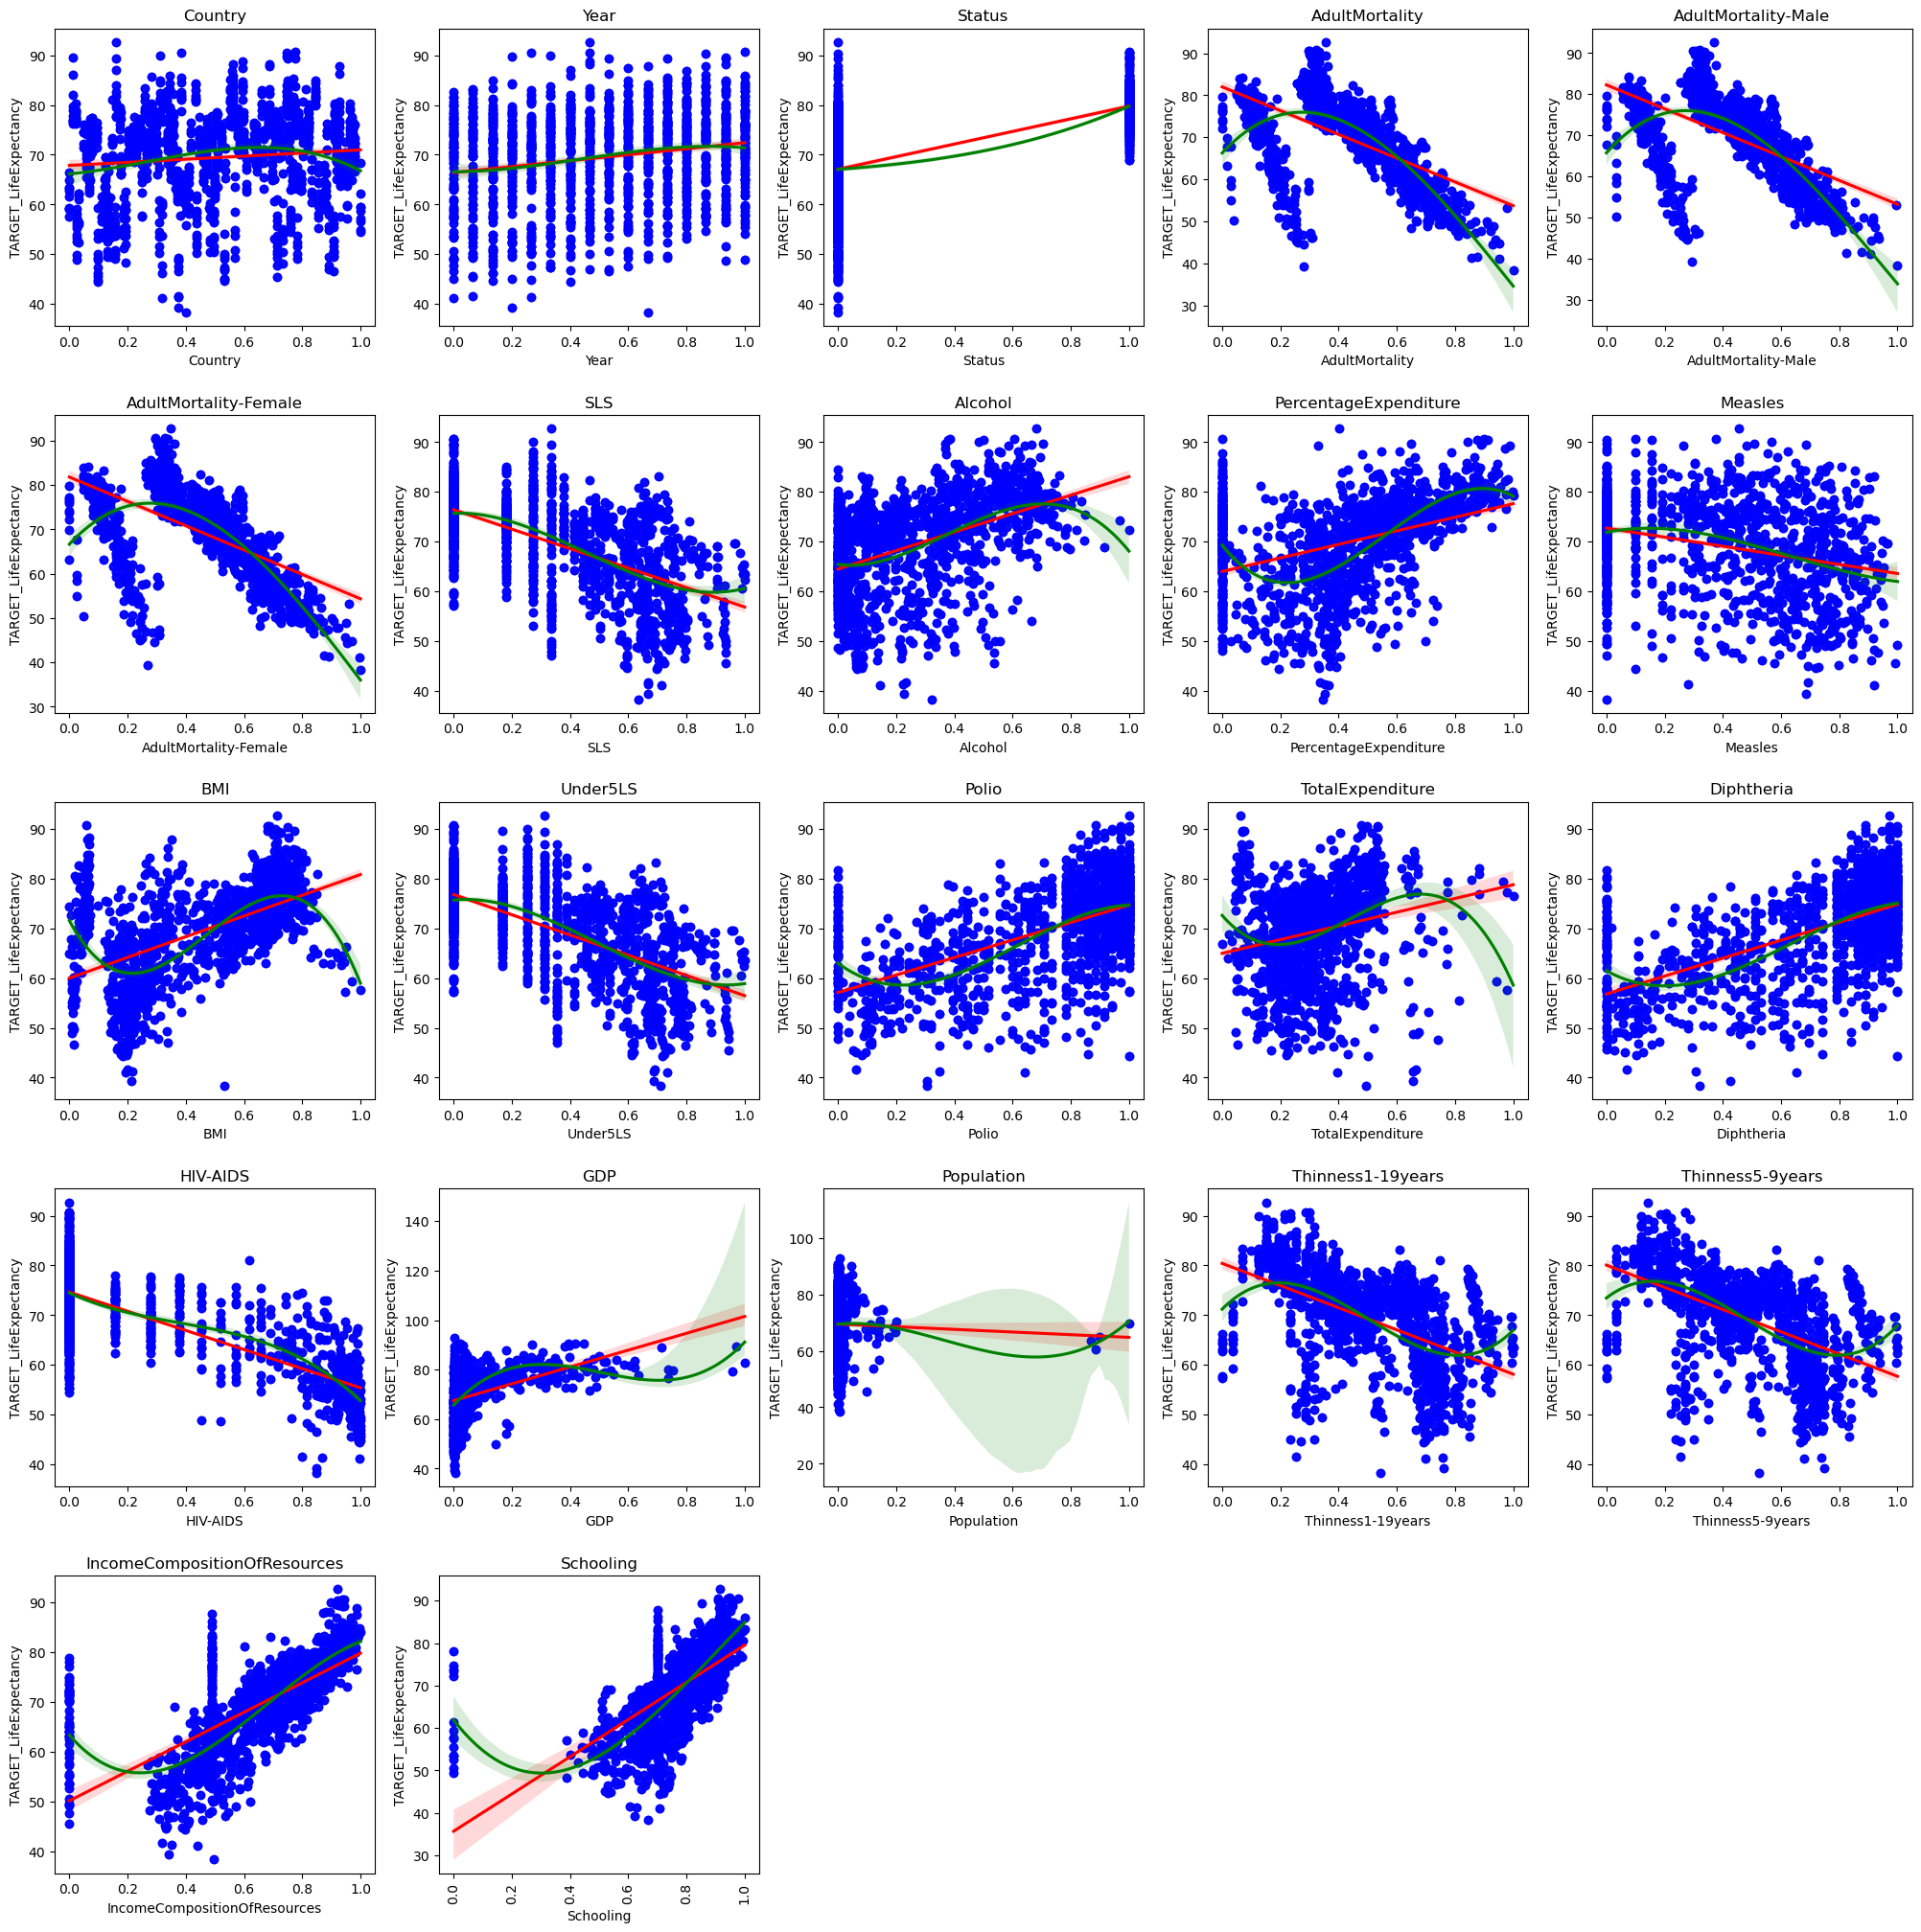

In [141]:
# Plotting this to see if the scaling has any effect on the dataset
import warnings
# Filter out warnings
warnings.filterwarnings('ignore')
# Trying out regplot which is better than the scatter plot to see how linear and poly model fit performs to decide our final model
plt.figure(figsize=(25,25))
for i, col in enumerate(life_X_train_scaled.columns):
    plt.subplot(5,5,i+1)# setting plot size, red line- linear model fit line, green - poly fit line
    sns.regplot(data=data, x=col, y=y_train_final,scatter_kws={'color': 'blue'},line_kws={'color': 'red'}) # blue-data points
    sns.regplot(data=life_X_train_scaled, x=col, y=y_train_final,scatter_kws={'color': 'blue'},order=3,line_kws={'color': 'green'})
    plt.title(col)

plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.3)
plt.show()

- As we can see the **green line(i.e. polynomial 3 fit)** has better advantage over linear model to capture data relationships over scaled data. Now for my final model, we will be using Ridge Regression for better regularization with poly features. Through rigorous hyperparameter tuning, we'll optimize the regularization strength to enhance predictive accuracy and generalization.

## Step 3: Why i choose polynomial regression with degree 2 and 3 as my final model

- I am choosing Polynomial regression with degrees 2 and 3 for our final model for life expectancy data due to its ability to capture nonlinear relationships between predictors and the target variable. As we can see from EDA, linear line cant fully disntinguish between i/p and o/p features using a simple line. It required a plane in paraboulic shape to distinguish the input features from output features

- By introducing polynomial features of degree 2 and 3, we allow the model to better capture complex patterns and interactions in the data that may not be adequately represented by linear models. This approach helps improve the model's flexibility and predictive performance, especially when the relationship between predictors and the target variable is not strictly linear. Additionally, higher-degree polynomial terms can capture more intricate relationships and fluctuations in the data, potentially leading to better model performance.

### Steps I followed in the code below for the final model

#### Step 3.1: Regularization and Justification:
In the code, we used Ridge regression, a type of regularization technique, to prevent overfitting in our model. By adding a penalty term to the loss function proportional to the square of the magnitude of coefficients (L2 regularization), Ridge regression helps control the complexity of the model and reduce the impact of multicollinearity.

#### Step 3.2: Hyperparameter Tuning:
We optimized the hyperparameter alpha for Ridge regression. The set of hyperparameters we optimized included the range of alpha values from 0.0001 to 10, with an increment of 0.001. By tuning alpha, we aimed to find the optimal regularization strength that minimizes the validation error and improves the model's generalization performance.

#### Step 3.3: Validation Setup and Performance:
We set up validation using k-fold cross-validation with k=5. This approach divided the dataset into five folds, where each fold served as a validation set once while the rest were used for training. This ensured that the model was validated on multiple subsets of the data, enhancing the reliability of performance evaluation and reducing dependency on a specific data split.

#### Step 3.4: Prediction Setup and Performance:
After hyperparameter tuning and model training, we made predictions on the test data using the trained Ridge regression model. This allowed us to assess the model's ability to generalize to unseen data and evaluate its performance in real-world scenarios.

#### Step 3.5: Evaluation Method and Justification:
For evaluation, I used common regression metrics such as root mean squared error (RMSE) to quantify the difference between the predicted and actual values. Additionally, I could use R-squared (R2) to measure the proportion of variance explained by the model. These metrics provided insights into how well the model performed and allowed us to compare different models or hyperparameter settings objectively.

By implementing regularization, hyperparameter tuning, validation, prediction, and evaluation in our code, we ensured that our machine learning model was robust, well-performing, and capable of generalizing to new data.


## Using Ridgecv & Ridge regressor for the final model with polynomial features 
#### Hyperparameters tuning and cross validation will be taken care by Ridgecv (concept taught in the module 1-4)

- By using ridgecv, i am utilizing both hyperparameter tuning and cross validation in this function
- I am using ridge, because linear regression

- alphas=(0.0001 till 10 with a step size of 0.001 is used as hyperparameter tuning.
- fit_intercept=True
- cv=5, which will perform 5 fold cross validation and choose the best fold and run that in the final test set.

- class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), *, fit_intercept=True, scoring=None, cv=None, gcv_mode=None, store_cv_values=False, alpha_per_target=False)

- Ridge cv performs same as the Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation. Array of alpha values to try and will choose the best alpha and the best fold by itself, which is similar to k-fold we performed in the lab.

**Why i choosed Ridge Regressor for model building.**

- In linear regression, we don't have a built-in way to handle multicollinearity or control model complexity. However, ridge regression comes to the rescue by adding a regularization term (controlled by alpha) to the linear regression equation. This term penalizes large coefficients, which helps reduce overfitting and makes the model more stable, especially when there's multicollinearity. Plus, ridge regression allows us to pick the best alpha using cross-validation, ensuring our model performs well on unseen data. So, it's a great choice when we need to deal with correlated predictors and prevent overfitting

- Choosing Ridge Regression for our data is advantageous due to its ability to handle multicollinearity, stabilize coefficient estimates, and control model complexity through regularization. This is crucial for our dataset, which contains multiple correlated features and requires a balance between bias and variance. Additionally, Ridge Regression is robust to outliers and performs well with high-dimensional data, making it suitable for our regression problem


### Testing with all features with polynomial degree as  2 and 3 and checking the r2 score

In [41]:
# this test with all the column in the dataframe with final model with dof 2 accuracy(87.04 on test data)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV
import numpy as np

# Defining the range of alpha values with start, stop and stepsize
alphas = np.arange(0.0001, 10.001, 0.001)

# Defining the degree of the polynomial
degree = 2  # You can adjust this as needed

# Generating polynomial features
poly_features = PolynomialFeatures(degree)

# Fitting with train data and transforming it to validation and test datas
X_train_poly = poly_features.fit_transform(life_X_train_scaled.to_numpy())
X_val_poly = poly_features.transform(life_X_val_scaled.to_numpy())
X_test_poly = poly_features.transform(life_X_test_scaled.to_numpy())

# Initialize RidgeCV model with alphas and 5-fold cross-validation
# this will perform each fold with different alphas and choose the best alpha with the best fold at the final results
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Fit RidgeCV model on training data
ridge_cv.fit(X_train_poly, y_train_final)

# Get the best alpha
best_alpha = ridge_cv.alpha_

# Fitting Ridge regression model with the best alpha
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train_poly, y_train_final)

# Making predictions for train, test and validation
y_train_pred = ridge_reg.predict(X_train_poly)
y_val_pred = ridge_reg.predict(X_val_poly)
y_test_pred = ridge_reg.predict(X_test_poly)

# Calculating RMSE and R2 score for training, validation, and test data
rmse_train = mean_squared_error(y_train_final, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val_final, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test_base, y_test_pred, squared=False)

r2_train = r2_score(y_train_final, y_train_pred)
r2_val = r2_score(y_val_final, y_val_pred)
r2_test = r2_score(y_test_base, y_test_pred)

# Print the results
print("Best alpha:", best_alpha)
print("Training RMSE:", rmse_train)
print("Validation RMSE:", rmse_val)
print("Test RMSE:", rmse_test)
print("Training R2 Score:", r2_train)
print("Validation R2 Score:", r2_val)
print("Test R2 Score:", r2_test)




Best alpha: 0.4561
Training RMSE: 3.0825274975234476
Validation RMSE: 3.392324399342061
Test RMSE: 3.396648321089954
Training R2 Score: 0.8983648769475273
Validation R2 Score: 0.8649866670350654
Test R2 Score: 0.8612853592418759


- The accuracy is good when we tested with all the features with poly degree as 2 and it yielded 0.86 as r2 test score. Will try poly degree as 3 and check the results

## Final Model using ridgeCV with polynomial degree 3

In [99]:
# this test with all the column in the dataframe with final model with dof 3 accuracy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


import numpy as np
from sklearn.linear_model import RidgeCV

# Define the range of alpha values
alphas = np.arange(0.0001, 1.001, 0.01)

# Define the degree of the polynomial
degree = 3  # You can adjust this as needed

# Generate polynomial features
poly_features = PolynomialFeatures(degree)
X_train_poly = poly_features.fit_transform(life_X_train_scaled.to_numpy())
X_val_poly = poly_features.transform(life_X_val_scaled.to_numpy())
X_test_poly = poly_features.transform(life_X_test_scaled.to_numpy())

# Initialize RidgeCV model with alphas and 5-fold cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Fit RidgeCV model on training data
ridge_cv.fit(X_train_poly, y_train_final)

# Get the best alpha
best_alpha = ridge_cv.alpha_

# Fit Ridge regression model with the best alpha
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train_poly, y_train_final)

# Make predictions
y_train_pred = ridge_reg.predict(X_train_poly)
y_val_pred = ridge_reg.predict(X_val_poly)
y_test_pred = ridge_reg.predict(X_test_poly)

# Calculate RMSE and R2 score for training, validation, and test data
rmse_train = mean_squared_error(y_train_final, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val_final, y_val_pred, squared=False)
rmse_test = mean_squared_error(y_test_base, y_test_pred, squared=False)

r2_train = r2_score(y_train_final, y_train_pred)
r2_val = r2_score(y_val_final, y_val_pred)
r2_test = r2_score(y_test_base, y_test_pred)

# Print the results
print("Best alpha:", best_alpha)
print("Training RMSE:", rmse_train)
print("Validation RMSE:", rmse_val)
print("Test RMSE:", rmse_test)
print("Training R2 Score:", r2_train)
print("Validation R2 Score:", r2_val)
print("Test R2 Score:", r2_test)




Best alpha: 1.0001
Training RMSE: 2.656442657099073
Validation RMSE: 3.253963599512802
Test RMSE: 3.2529387538290977
Training R2 Score: 0.9245201915124159
Validation R2 Score: 0.8757754914864833
Test R2 Score: 0.8727748688654897


- The accuracy is better than polynomial model with degree 2, when we selected poly 3 with all the features,the model yielded 0.872 as r2 test score. Our second hypothesis while determining the goal was to achieve as r2 value more than 0.87 and we have achieved that

- The model meets the assumptions/hypothesis 2 made when we determined the goal in the starting of the assignment.


### Testing with selected features with polynomial degree as 3, based on feature importance and checking the r2 score

### Checking/Testing Polynomial 3 with Selected Features for our final model
### Feature Sets:

- **selected_features_1:** [TotalExpenditure, Measles, Thinness5-9years, AdultMortality, Under5LS, HIV-AIDS, AdultMortality-Male, AdultMortality-Female, SLS, Alcohol, Diphtheria, GDP, Thinness1-19years, IncomeCompositionOfResources, Schooling, Status]

- **selected_features_2:** [AdultMortality-Male, AdultMortality-Female, SLS, IncomeCompositionOfResources, AdultMortality, Under5LS, HIV-AIDS, Thinness5-9years]

- **selected_features_3:** [AdultMortality-Male, AdultMortality-Female, SLS, Under5LS, HIV-AIDS, AdultMortality]


#### In the above code, after selecting the feature set and if we add this part in the starting and run it, you can see these results below. 

- X_train_selected_test = life_X_train_scaled[selected_features_3]
- X_val_selected_test = life_X_val_scaled[selected_features_3]
- X_test_selected_test = life_X_test_scaled[selected_features_3]


### Results:

| Model               | Best Alpha | Training RMSE | Validation RMSE | Test RMSE | Training R2 Score | Validation R2 Score | Test R2 Score |
|---------------------|------------|---------------|-----------------|-----------|-------------------|---------------------|---------------|
| selected_features_1 |    0.1451  |    3.2626     |      3.3845     |   3.2987  |       0.8775      |        0.8835       |    0.8794     |
| selected_features_2 |    0.1041  |    3.7690     |      3.7185     |   3.5943  |       0.8365      |        0.8594       |    0.8568     |
| selected_features_3 |    0.0441  |    4.3047     |      4.4559     |   4.0959  |       0.7867      |        0.7981       |    0.8141     |


    
#### I am not showing/running the code below seperately for these tests, because the code will take some time to run.

### **Final Model Selected:**
- **Model Chosen:** Polynomial regression with degree 3, trained on all features.
- **Reasoning:** Despite slightly lower R2 test score (0.872) compared to selected_features_1 (0.88), this model's robustness to real-life data and adherence to assignment requirements outweigh the difference.
- **Key Metrics:**
  - Best Alpha: 1.0001
  - Training RMSE: 2.656
  - Validation RMSE: 3.254
  - Test RMSE: 3.253
  - Training R2 Score: 0.925
  - Validation R2 Score: 0.876
  - Test R2 Score: 0.873


#### What does this alpha value means?

- The alpha value chosen (1.0001) suggests that the model is employing a moderate level of regularization while training. This regularization is crucial in preventing overfitting by penalizing overly large coefficients, ensuring a more balanced and generalized model. By optimizing the regularization strength using the validation set, we achieve the reported RMSE and R2 scores for both validation and test datasets, reflecting the model's performance and generalization ability.

#### How can we further imporve the final model
To further enhance the model's performance:
- **Outlier Detection:** Implement techniques to detect and handle outliers, which can introduce noise and bias, impacting model performance.

- **Feature Engineering:** Explore creating new features or transforming existing ones to better capture underlying data patterns, thereby improving model accuracy.

- **Algorithm Exploration:** Experiment with different machine learning algorithms like Random Forest, Gradient Boosting, or Neural Networks to identify the best-performing model.

- **For this assignment we had to use regression model** and, I used what was taught from module1 to module 4 which had ridge model and cv concept.

## Predicting the Final Test Data in test.csv

#### Steps I followed in the code below for the final Prediction

- **1.Loading Data:** Loading the test.csv file and store it in final_test_data
- **2.Removing ID:**  Removing ID column before predicting because we wont need that
- **3.Scaling Test Data ID to match Final model scaling :** Transforming test data following the same procedure what we used for our final model, so the data transformation are in the same final model trained format before inputting the data for prediction.
- **4.Transforming Test Data features into polynomial features with degree as 3, same as final model**
- **5.Predicting the Target_lifeExpectancy Features through predict function**
- **6.Storing the results:** After predicting storing the results with ID and Target_lifeExpectancy column to a file named S3967377_Test_predictions.csv


In [127]:
import pandas as pd

# Loading the test dataset from test.csv
final_test_data = pd.read_csv('test.csv')


# Segregating the data without ID column and storing it
final_test_data_without_ID = final_test_data.iloc[:, 1:] 

# Define the degree of the polynomial
degree = 3  # setting what we used in the final model 


In [128]:
# Applying the same transformation as we did to the final model to the test data, so the model knows what these features values mean
power_transformer_attributes = ['AdultMortality','AdultMortality-Male','AdultMortality-Female','Thinness1-19years',\
                                'Thinness5-9years','SLS','Under5LS','PercentageExpenditure','Measles',\
                                'Polio','Diphtheria','HIV-AIDS']

# Using set function to get the remaining attributes assigned to min_max_attributes
min_max_attributes = list(set(final_test_data_without_ID.columns).difference(set(power_transformer_attributes)))


# Creating copies of final test data set
X_final_test_poly = final_test_data_without_ID.copy()


# Transforming MinMaxScaler() on min-max attributes for  Final test.csv file
X_final_test_poly.loc[:, min_max_attributes] = minmaxscaler.transform(X_final_test_poly.loc[:, min_max_attributes])

# Fitting and transforming PowerTransformer() on power transformer attributes for Final test.csv file
X_final_test_poly.loc[:, power_transformer_attributes] = powertransformer.transform(X_final_test_poly.loc[:, power_transformer_attributes])

# Fitting and transforming MinMaxScaler on power transformer attributes for Final test.csv file
X_final_test_poly.loc[:, power_transformer_attributes] = minmaxscaler_pt.transform(X_final_test_poly.loc[:, power_transformer_attributes])



In [129]:
# Checking if the transformation shape is proper
X_final_test_poly.shape

(867, 22)

In [131]:
X_final_test_poly.head()

,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,0.625,1.000000,0.0,0.706541,0.676360,0.739645,0.757175,0.354983,0.000000,0.556021,...,0.000508,0.201393,0.294609,0.850028,0.030998,0.002153,0.724215,0.702441,0.560127,0.770552
1,0.625,0.933333,0.0,0.719999,0.701185,0.741706,0.758739,0.465845,0.305684,0.870580,...,0.334839,0.170633,0.294609,0.859679,0.004008,0.002081,0.730009,0.705451,0.555907,0.770552
2,0.625,0.866667,0.0,0.727131,0.725071,0.731337,0.761785,0.452968,0.344289,0.853700,...,0.320731,0.225769,0.494181,0.883626,0.004052,0.002009,0.732852,0.711361,0.551688,0.770552
3,0.625,0.800000,0.0,0.730164,0.711246,0.751913,0.766158,0.460806,0.539596,0.817230,...,0.445224,0.170052,0.459074,0.901917,0.038571,0.000201,0.738433,0.714262,0.535865,0.732433
4,0.625,0.733333,0.0,0.733183,0.730907,0.737578,0.770314,0.450728,0.532909,0.747334,...,0.411555,0.174695,0.393792,0.896332,0.036061,0.018718,0.741172,0.719961,0.522152,0.699702


In [132]:

# Generate polynomial features
poly_features = PolynomialFeatures(degree)


In [133]:
# Transforming it to required scale needed for the model which is same as final model
X_test_final_poly = poly_features.fit_transform(X_final_test_poly.to_numpy())

In [134]:
len(X_test_final_poly)

867

In [136]:
# # Make predictions using the final model for the transformed test data input
y_final_test_pred = ridge_reg.predict(X_test_final_poly)

# Creating a DataFrame containing the 'ID' column and the predicted target values
predictions_df = pd.DataFrame({'ID': final_test_data['ID'], 'Target_LifeExpectancy': y_final_test_pred.flatten()})

# printing to check if the df is in the proper form('ID' ,'predicted target values')
print(predictions_df)

      ID  Target_LifeExpectancy
0      1              58.081057
1      2              57.680781
2      3              57.173994
3      4              56.856131
4      5              56.061296
..   ...                    ...
862  863              39.219665
863  864              39.868692
864  865              54.976359
865  866              41.200997
866  867              43.776998

[867 rows x 2 columns]


In [142]:
# Saving the prediction results to s3967377_test_prediction_results.csv
predictions_df.to_csv('S3967377_Test_Predictions.csv',index=False)